# Proyecto precio casas santiago

*Realizado por Pablo Cortés Cataldo*

## Definición del problema

El problema consiste en desarrollar un modelo predictivo que permita determinar el precio de las casas en la Región Metropolitana de Santiago de Chile, tomando en cuenta una serie de variables como la ubicación, la superficie construida, la cantidad de habitaciones, la presencia de amenidades cercanas (por ejemplo, parques, colegios, supermercados), entre otros factores relevantes. El objetivo es que este modelo sea capaz de proporcionar una estimación precisa y confiable del precio de una propiedad en función de sus características, lo que podría ser de gran utilidad para compradores y vendedores de viviendas, así como para empresas del sector inmobiliario que buscan tomar decisiones basadas en datos y tendencias del mercado.

## Obtención de la data

Los datos fueron obtenidos de la página web https://www.portalinmobiliario.com/ mediante web scraping con los frameworks Beautiful Soup y Selenium. No obstante, es relevante destacar que actualmente esta técnica no es considerada escalable debido a que estos frameworks no son lo suficientemente eficientes para este propósito.

In [108]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt 

In [109]:
nombre = 'datos_casas_santiago.csv'

df = pd.read_csv(nombre)
df

,Precio,Comuna,Barrio,Superficie total,Superficie útil,Dormitorios,Baños,Estacionamientos,Bodegas,Cantidad de pisos,...,Paraderos,Jardines infantiles,Colegios,Universidades,Plazas,Supermercados,Farmacias,Centros comerciales,Hospitales,Clínicas
0,5650 unidades de fomento,Buin,Linderos,190 m²,129 m²,3.0,3.0,1.0,0.0,2.0,...,0,1,2,0,1,1,0,0,0,0
1,11000 unidades de fomento,Buin,Linderos,700 m²,140 m²,4.0,4.0,3.0,0.0,1.0,...,0,1,3,0,1,1,0,0,0,0
2,10200 unidades de fomento,Buin,Linderos,680 m²,140 m²,4.0,2.0,2.0,0.0,1.0,...,0,1,3,0,1,1,0,0,0,0
3,4771 unidades de fomento,Buin,NaN,173 m²,100 m²,3.0,3.0,2.0,0.0,2.0,...,0,0,0,0,4,0,0,0,0,0
4,10200 unidades de fomento,Buin,Linderos,740 m²,140 m²,4.0,3.0,3.0,0.0,1.0,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33596,10500 unidades de fomento,Ñuñoa,Parque Botánico,230 m²,135 m²,3.0,1.0,1.0,NaN,1.0,...,5,5,5,2,5,5,5,1,1,5
33597,6050 unidades de fomento,Ñuñoa,Villa Los Jardínes - Villa Los Presidentes,176 m²,103 m²,4.0,2.0,2.0,NaN,1.0,...,5,5,5,3,5,5,5,1,3,3
33598,1968 unidades de fomento,Ñuñoa,Estadio Nacional,65 m²,70 m²,2.0,1.0,NaN,NaN,1.0,...,5,5,5,4,5,5,5,1,2,2
33599,14052 unidades de fomento,Ñuñoa,Metro Irarrázaval,247 m²,247 m²,3.0,2.0,1.0,1.0,2.0,...,5,1,5,0,5,5,5,0,0,0


Además se extrae el índice de desarrollo comunal, el cual vendría a ser un equivalente al índice de desarrollo humano pero por comuna.

In [110]:
nombre = 'IDC.xlsx'

idc = pd.read_excel(nombre)
idc

,COMUNA,BIENESTAR,ECONOMÍA,EDUCACIÓN,IDC,RANKING NACIONAL,RANGOS
0,PROVIDENCIA,0.9847,"0,7764",0.8780,0.8756,1,Alto
1,LAS CONDES,0.9926,"0,7800",0.8660,0.8752,2,Alto
2,SANTIAGO,0.8953,"0,6350",0.8276,0.7778,3,Alto
3,VITACURA,0.9946,"0,4982",0.9002,0.7641,4,Alto
4,LO BARNECHEA,0.9450,"0,4029",0.8160,0.6773,5,Alto
5,ÑUÑOA,0.9681,"0,3601",0.8254,0.6602,7,Alto
6,SAN MIGUEL,0.9452,"0,3060",0.7774,0.6081,10,Medio alto
7,LA REINA,0.9700,"0,2823",0.8186,0.6074,11,Medio alto
8,MAIPÚ,0.9695,"0,2817",0.7793,0.5970,13,Medio alto
9,LA FLORIDA,0.9535,"0,2838",0.7545,0.5888,16,Medio alto


## Descripción básica de los datos

Se corrobora en primera instancia la cantidad de datos por variable y si existen nulos.

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33601 entries, 0 to 33600
Data columns (total 77 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Precio                         33601 non-null  object 
 1   Comuna                         33601 non-null  object 
 2   Barrio                         31626 non-null  object 
 3   Superficie total               33467 non-null  object 
 4   Superficie útil                33312 non-null  object 
 5   Dormitorios                    33474 non-null  float64
 6   Baños                          33443 non-null  float64
 7   Estacionamientos               31374 non-null  float64
 8   Bodegas                        19334 non-null  float64
 9   Cantidad de pisos              24418 non-null  float64
 10  Tipo de casa                   14154 non-null  object 
 11  Antigüedad                     22576 non-null  object 
 12  Gastos comunes                 14210 non-null 

### Valores duplicados

Primero que todo se buscan aquellos valores duplicados 

In [112]:
df.duplicated().any()

False

A pesar de que el método *duplicated()* indica que no hay valores duplicados exactamente, después de una breve inspección se encontro que existen registros duplicados pero que no son completamente iguales, es decir, los usuarios registran distintas características de la casa en dos o más publicaciones, además el web scraping realizado para la recolección de los datos se cayo en dos ocasiones por la intermitencia de la conexión a internet, generando la duplicación de registros, es por ello que se eliminarán todos aquellos registros que tengan el mismo precio, superficie total, superficie útil, dormitorios, baños y que además se encuentren en la misma comuna y barrio.

In [113]:
#pd.options.display.max_rows = 60
df = df.drop_duplicates(subset = ['Precio', 'Comuna', 'Barrio', 'Superficie total', 'Superficie útil', 'Dormitorios', 'Baños'])
df = df.reset_index(drop=True)

### Variables no relevantes

Existen variables con una gran cantidad de valores nulos y en algunos casos, el tipo de datos no es el adecuado, lo que impide la aplicación de distintos métodos. Por lo tanto, primero serán eliminadas todas aquellas variables que son consideradas como no relevantes o redundantes para la estimación del precio de una casa.

En este caso, las variables a eliminar por no ser relevantes para el problema son: Tipo de casa, Gastos comunes, Alarma, Conserjería, Portón automático, Acceso controlado, Closets, Baño de visitas, Comedor, Walk-in closet, Homeoffice, Living, Patio, Dormitorio en suite, Balcón, Jardín, Cocina, Dormitorio y baño de servicio, Playroom, Logia, Desayunador, Aire acondicionado, Calefacción, TV por cable, Línea telefónica, Con conexión para lavarropas, Agua corriente, Cisterna, Chimenea, Gimnasio, Estacionamiento de visitas, Área de cine, Área de juegos infantiles, Con área verde, Sauna y Refrigerador.

Un total de 37 variables fueron descartadas, quedando un total de 39 variables predictoras.

In [236]:
#Se crea una copia del dataframe
dfc = df.copy()
def drop_var(df):
    var_drop = ['Tipo de casa', 'Gastos comunes', 'Alarma', 'Conserjería', 'Portón automático', 'Acceso controlado', 
                'Closets', 'Baño de visitas', 'Comedor', 'Walk-in clóset', 'Homeoffice', 'Living', 'Patio', 
                'Dormitorio en suite', 'Balcón', 'Jardín', 'Cocina', 'Dormitorio y baño de servicio', 'Playroom', 
                'Logia', 'Desayunador', 'Acceso a internet', 'Aire acondicionado', 'Calefacción', 'TV por cable', 
                'Línea telefónica', 'Con conexión para lavarropas', 'Agua corriente', 'Cisterna', 'Chimenea', 
                'Gimnasio', 'Estacionamiento de visitas', 'Área de cine', 'Área de juegos infantiles', 
                'Con área verde', 'Sauna', 'Refrigerador']
    df_drop = df.drop(var_drop, axis=1)
    return df_drop

dfc = drop_var(dfc)

El nombre de algunas variables (columnas) serán cambiadas para facilitar calculos posteriores.

In [237]:
dfc = dfc.rename(columns=lambda x: x.lower())
dfc.columns

Index(['precio', 'comuna', 'barrio', 'superficie total', 'superficie útil',
       'dormitorios', 'baños', 'estacionamientos', 'bodegas',
       'cantidad de pisos', 'antigüedad', 'con condominio cerrado', 'quincho',
       'piscina', 'terraza', 'mansarda', 'gas natural', 'generador eléctrico',
       'con energia solar', 'caldera', 'jacuzzi', 'ascensor',
       'cancha de básquetbol', 'con cancha de fútbol', 'cancha de paddle',
       'cancha de tenis', 'con cancha polideportiva', 'salón de fiestas',
       'amoblado', 'estaciones de metro', 'paraderos', 'jardines infantiles',
       'colegios', 'universidades', 'plazas', 'supermercados', 'farmacias',
       'centros comerciales', 'hospitales', 'clínicas'],
      dtype='object')

In [238]:
dfc = dfc.rename(columns={'superficie total': 'superficie_total', 'superficie útil': 'superficie_util', 
                          'antigüedad': 'antiguedad', 'cantidad de pisos': 'cantidad_pisos', 
                          'con condominio cerrado': 'condominio_cerrado', 'gas natural': 'gas_natural', 
                          'generador eléctrico': 'generador_electrico', 'con energia solar': 'energia_solar', 
                          'cancha de básquetbol': 'c_basquetbol', 'con cancha de fútbol': 'c_futbol', 
                          'cancha de paddle': 'c_paddle', 'cancha de tenis': 'c_tenis', 
                          'con cancha polideportiva': 'c_polideportiva', 'salón de fiestas': 'salon_fiestas', 
                          'estaciones de metro': 'estaciones_metro', 'jardines infantiles': 'jardines_infantiles', 
                          'centros comerciales': 'centros_comerciales', 'clínicas': 'clinicas'})

### Valores nulos

La gran mayoría de variables cuenta con valores nulos, por lo que se aplicará un método de imputación para reemplazar esos valores.

In [239]:
nulos_por_columna = dfc.isnull().sum().sort_values(ascending=False)
nulos_por_columna = nulos_por_columna[nulos_por_columna > 0]
print(nulos_por_columna)

c_basquetbol           21227
c_paddle               21128
c_polideportiva        21078
ascensor               21068
c_futbol               21054
c_tenis                21002
salon_fiestas          20707
generador_electrico    20692
energia_solar          20679
caldera                20227
condominio_cerrado     19850
amoblado               18158
jacuzzi                13496
mansarda               13202
bodegas                12632
gas_natural            11793
antiguedad              9813
quincho                 9459
piscina                 8444
cantidad_pisos          8235
terraza                 7506
estacionamientos        2006
barrio                  1819
superficie_util          288
baños                    156
superficie_total         134
dormitorios              126
dtype: int64


# Limpieza preliminar

Esta limpieza preliminar se hace para eliminar aquellos datos que fueron ingresados de manera erronéa y no corresponden a un dato y también para eliminar caracteres o palabras que vienen incluidas en la data.

## Variables Binarias

Primero se procesan las variables binarias.

In [240]:
dfc.columns

Index(['precio', 'comuna', 'barrio', 'superficie_total', 'superficie_util',
       'dormitorios', 'baños', 'estacionamientos', 'bodegas', 'cantidad_pisos',
       'antiguedad', 'condominio_cerrado', 'quincho', 'piscina', 'terraza',
       'mansarda', 'gas_natural', 'generador_electrico', 'energia_solar',
       'caldera', 'jacuzzi', 'ascensor', 'c_basquetbol', 'c_futbol',
       'c_paddle', 'c_tenis', 'c_polideportiva', 'salon_fiestas', 'amoblado',
       'estaciones_metro', 'paraderos', 'jardines_infantiles', 'colegios',
       'universidades', 'plazas', 'supermercados', 'farmacias',
       'centros_comerciales', 'hospitales', 'clinicas'],
      dtype='object')

Los **Sí** son reemplazados por **Si**(se les quita el acento).

In [241]:
for columna in dfc.loc[: , 'condominio_cerrado':'amoblado'].columns:
    print(dfc[columna].value_counts())

condominio_cerrado
No    6914
Si    1159
Sí    1039
Name: count, dtype: int64
quincho
No    12746
Si     3410
Sí     3347
Name: count, dtype: int64
piscina
No    10469
Sí     5115
Si     4934
Name: count, dtype: int64
terraza
No    9951
Si    5753
Sí    5752
Name: count, dtype: int64
mansarda
No    13824
Si      992
Sí      944
Name: count, dtype: int64
gas_natural
No    10300
Si     3443
Sí     3426
Name: count, dtype: int64
generador_electrico
No    8048
Sí     118
Si     104
Name: count, dtype: int64
energia_solar
No    8094
Sí     100
Si      89
Name: count, dtype: int64
caldera
No    7425
Sí     662
Si     648
Name: count, dtype: int64
jacuzzi
No    13084
Sí     1221
Si     1161
Name: count, dtype: int64
ascensor
No    7852
Si      23
Sí      19
Name: count, dtype: int64
c_basquetbol
No    7669
Si      40
Sí      26
Name: count, dtype: int64
c_futbol
No    7724
Si      94
Sí      90
Name: count, dtype: int64
c_paddle
No    7774
Sí      35
Si      25
Name: count, dtype: int64
c_ten

In [242]:
for columna in dfc.loc[: , 'condominio_cerrado':'amoblado'].columns:
    dfc[columna] = dfc[columna].replace('Sí', 'Si')

Los ceros de la variable amoblado se asumen como **No**.

In [243]:
dfc['amoblado'] = dfc['amoblado'].replace('0', 'No')

Se les asigna un 0 para el caso **No** y 1 para el caso **Si**, con el fin evitar errores para el entrenamiento de los modelos.

In [244]:
for columna in dfc.loc[: , 'condominio_cerrado':'amoblado'].columns:
    dfc[columna] = dfc[columna].replace('Si', 1)
    dfc[columna] = dfc[columna].replace('No', 0)

## Variables Númericas

En general se consideran todas las variables numéricas de tipo discreto, ya que, es muy raro que se tome alguna de estas en formato continuo o con decimales.

### Variable Precio

La variable precio será transformada de la siguiente manera:

- Primero se separa el número del resto de caracteres.
- Se mantendrá como unidad pesos, por lo que todos los precios en UF serán transformados a pesos.
- Para evitar problemas posteriores, lo valores decimales serán aproximados al entero superior mas cercano.

Se considera una UF equivalente a 36.000 CLP.

In [245]:
# Valor de la UF
UF = 36000

# Precio final
dfc['precio_f'] = dfc['precio'].apply(lambda x: math.ceil(float(x.split()[0]) * UF) if len(x.split()) != 2 else math.ceil(float(x.split()[0])))
dfc = dfc.drop('precio', axis=1)

Por otra parte, serán eliminadas aquellas casas que posean un precio superior a los 5.000.000.000 millones, ya que se consideran valores atípicos muy extremos que podrían perjudicar el análisis y posterior desempeño del modelo. En total, serán 11 registros eliminados.

In [246]:
len(dfc.loc[dfc['precio_f'] > 5000000000])

11

In [247]:
dfc = dfc.drop(dfc.loc[dfc['precio_f'] > 5000000000].index, axis = 0)

### Variables Superficie total y Superficie útil

Los registros que tengan ambas variables nulas serán eliminados.

In [248]:
# Se descartan aquellos registros que tengan tanto la superficie total como la superficie útil nula.
dfc = dfc.drop(dfc.loc[(dfc['superficie_total'].isna()) & (dfc['superficie_util'].isna())].index, axis = 0)

Estas variables vienen con la unidad de medida incluida, por lo que solo se mantendrá el número que corresponde a la superficie y los decimales serán aproximados al entero superior mas cercano.

In [249]:
superficies = ['superficie_total', 'superficie_util']
for columna in superficies:
    dfc[columna + '_num'] = dfc[columna].apply(lambda x: math.ceil(float(x.split(' ')[0])) if isinstance(x, str) else x)

dfc = dfc.drop(superficies, axis=1)

Para evitar malas interpretaciones en los análisis siguientes, se descartan los registros que tengan una superficie total mayor a 20.000 metros cuadrados o una superficie util mayor a 1500 metros cuadrados, debido a que existe una alta probabilidad de que sean datos erronéos.

In [250]:
len(dfc.loc[dfc['superficie_total_num'] > 20000])

50

In [251]:
len(dfc.loc[dfc['superficie_util_num'] > 1500])

180

In [252]:
dfc = dfc.drop(dfc.loc[(dfc['superficie_total_num'] > 20000) | (dfc['superficie_util_num'] > 1500)].index, axis = 0)

### Variable Dormitorios

Se considera que esta variable claramente tiene anomalías, ya que existe una casa con 63 habitaciones lo que podría ser por un ingreso erronéo de los datos. Se opta por eliminar aquellos registros sobre los 25 dormitorios, más que eso existe la duda de que realmente sean casas.

In [253]:
dfc.dormitorios.value_counts()

dormitorios
4.0     8911
3.0     8473
5.0     5833
6.0     2399
2.0     1400
7.0      664
8.0      268
9.0      132
0.0      117
10.0      89
1.0       88
11.0      31
12.0      27
15.0      18
14.0      17
16.0      14
13.0      11
20.0       8
18.0       5
30.0       4
25.0       4
23.0       3
17.0       3
22.0       2
21.0       2
32.0       2
29.0       1
63.0       1
27.0       1
24.0       1
35.0       1
19.0       1
43.0       1
Name: count, dtype: int64

In [254]:
dfc = dfc.drop(dfc.loc[dfc['dormitorios'] > 25].index, axis = 0)

### Variable Baños

Se considera que esta variable tiene anomalías, ya que existen una casa con 29 baños lo que podría ser por un ingreso erronéo de los datos. Se opta por eliminar aquellos registros sobre los 15 baños, más que eso existe la duda de que realmente sean casas.

In [255]:
dfc.baños.value_counts()

baños
3.0     8051
2.0     6496
4.0     5828
1.0     3892
5.0     2714
6.0      829
7.0      313
0.0      145
8.0      114
9.0       48
10.0      29
15.0       9
12.0       8
11.0       5
21.0       2
13.0       2
23.0       1
19.0       1
29.0       1
25.0       1
17.0       1
Name: count, dtype: int64

In [256]:
dfc = dfc.drop(dfc.loc[dfc['baños'] > 15].index, axis = 0)

### Variable Estacionamientos

Esta variable presenta datos erronéos, ya que no se considera normal tener valores negativos ni mayores a 20, por ende, serán eliminados. Aún con 20 estacionamientos se considera raro, por lo que se verá mas adelantes mediante el criterio del rango intercuartílico.

In [257]:
dfc.estacionamientos.value_counts()

estacionamientos
 2.0       9492
 3.0       4403
 1.0       4345
 4.0       2920
 0.0       2034
 5.0       1187
 6.0       1003
 8.0        424
 10.0       277
 7.0        261
 9.0         75
 12.0        68
 15.0        33
 14.0        26
 13.0        26
 20.0        25
 11.0        17
 16.0        10
 19.0         8
 30.0         5
 22.0         5
 25.0         4
 23.0         3
 17.0         3
 31.0         2
 18.0         2
 29.0         2
 33.0         2
 1269.0       2
 35.0         2
 50.0         2
 24.0         1
 307.0        1
 80.0         1
 40.0         1
 21.0         1
 32.0         1
 39.0         1
 38.0         1
-2.0          1
 607.0        1
Name: count, dtype: int64

In [258]:
dfc = dfc.drop(dfc.loc[(dfc['estacionamientos'] > 20) | (dfc['estacionamientos'] < 0)].index, axis = 0)

### Variable Bodegas

Se considera que esta variable tiene anomalías, ya que existen casas con más de 5 bodegas, llegando a 111 inclusive, lo que podría ser por un ingreso erronéo de los datos. Se opta por eliminar aquellos registros sobre las 5 bodegas.

In [259]:
dfc.bodegas.value_counts()

bodegas
1.0      10461
0.0       4395
2.0       1066
3.0        172
4.0         42
6.0          5
5.0          5
10.0         3
11.0         3
12.0         2
7.0          2
111.0        1
21.0         1
16.0         1
13.0         1
8.0          1
Name: count, dtype: int64

In [260]:
dfc = dfc.drop(dfc.loc[dfc['bodegas'] > 5].index, axis = 0)

### Variable Cantidad de pisos

Se considera hasta un máximo de 5 pisos por casa, por lo que aquellas casas con una cantidad de pisos mayores a esta serán descartados, por otro lado, los pisos negativos también serán descartados. 

In [261]:
dfc['cantidad_pisos'].value_counts()

cantidad_pisos
 2.0       12449
 1.0        4191
 3.0        1928
 0.0        1825
 4.0          72
 5.0          12
 7.0           4
 6.0           3
 21.0          2
 34.0          1
 20.0          1
 10.0          1
 16.0          1
 1983.0        1
-1.0           1
 12.0          1
 11.0          1
 330.0         1
 9.0           1
 25.0          1
 99.0          1
Name: count, dtype: int64

In [262]:
dfc = dfc.drop(dfc.loc[(dfc['cantidad_pisos'] > 5) | (dfc['cantidad_pisos'] < 0)].index, axis = 0)

### Variable Antigüedad

Esta variable ha sido ingresada de manera erronéa en muchos casos, ya que en vez de agregar la antigüedad se agrega el año de construcción, también exiten años negativos.

Por lo tanto, se procesarán los datos de la siguiente manera:

- Primero la palabra "años" se eliminará.
- Los negativos serán transformados a positivos.
- Si existe una variable con decimales, esta será aproximada al entero superior mas cercano para evitar conflictos con el tipo de datos.
- Aquellas casas que tengan una antigüedad entre 700 y el año actual menos 1000(es decir, 1023 para el año actual 2023), se les sumarán otros 1000 años, ya que se presume que este dato es el año de construcción, al cual le falto anteponer el 1 delante o se equivocaron y teclearon el 1 en vez del 2. Después, al año actual se le restará el año de construcción.
- Los valores que sean mayores al año actual serán directamente descartados.
- Se considera factible hasta una antigüedad máxima de 300 años, ya que estas casas probablemente fueron reconstruidas o remodeladas.

In [263]:
from datetime import datetime

antiguedad_num = []
for antiguedad in dfc['antiguedad']:
    if antiguedad is not np.NaN:
        antiguedad_lista = antiguedad.split(' ')
        antiguedad_numero = float(antiguedad_lista[0])
        antiguedad_positiva = math.ceil(abs(antiguedad_numero))
        if antiguedad_positiva > 700 and antiguedad_positiva < (datetime.now().year - 1000):
            antiguedad_positiva += 1000
        if antiguedad_positiva > 1700 and antiguedad_positiva <= datetime.now().year:
            antiguedad_positiva = datetime.now().year - antiguedad_positiva
        antiguedad_num.append(antiguedad_positiva)
    else:
        antiguedad_num.append(antiguedad)

dfc['antiguedad_num'] = antiguedad_num
dfc = dfc.drop('antiguedad', axis=1)

In [264]:
# Eliminación de filas con una antiguedad mayor al año actual
dfc = dfc.drop(dfc.loc[dfc['antiguedad_num'] > datetime.now().year].index, axis = 0)

## Variables Categóricas

### Variable Comuna y Barrio

Existen diversos casos particulares a considerar para estas variables:

1. Algunos valores de la variable comuna corresponden al barrio.
2. Existe una comuna denominada RM (Metropolitana) la cual no es real, si no que es el nombre al que se denomina a la región, y en algunos casos el barrio corresponde a la comuna.
3. También existen otros casos en donde el barrio corresponde a la comuna.

Para resolver estos incovenientes, primero se define la lista de todas las comunas de santiago sin caracteres especiales ni mayúsculas.

In [265]:
from unidecode import unidecode
comunas = ['Alhué', 'Buin', 'Calera-de-tango', 'Cerrillos', 'Cerro-navia', 'Colina', 'Conchalí', 'Curacaví', 
           'El-bosque', 'El-monte', 'Estación-central', 'Huechuraba', 'Independencia', 'Isla-de-maipo', 
           'La-cisterna', 'La-florida', 'La-granja', 'La-pintana', 'La-reina', 'Lampa', 'Las-condes', 
           'Lo-barnechea', 'Lo-espejo', 'Lo-prado', 'Macul', 'Maipú', 'María-pinto', 'Melipilla', 
           'Padre-hurtado', 'Paine', 'Pedro-aguirre-cerda', 'Peñaflor', 'Peñalolén', 'Pirque', 'Providencia', 
           'Pudahuel', 'Puente-alto', 'Quilicura', 'Quinta-normal', 'Recoleta', 'Renca', 'San-bernardo', 
           'San-joaquín', 'San-josé-de-maipo', 'San-miguel', 'San-pedro', 'San-ramón', 'Santiago', 
           'Talagante', 'Tiltil', 'Vitacura', 'Ñuñoa']

comunas = [unidecode(x.lower().replace('-', ' ')) for x in comunas]

Luego se hace lo mismo pero con los registros de la variable comuna y barrio para evitar conflictos por acentos o mayúsculas para poder reemplazar entre las variables.

In [266]:
dfc['comuna'] = dfc['comuna'].apply(lambda x: unidecode(x.lower()) if not pd.isnull(x) else x)

In [267]:
dfc['barrio'] = dfc['barrio'].apply(lambda x: unidecode(x.lower()) if not pd.isnull(x) else x)

Cuando el nombre de la comuna no esta presente dentro de la lista **comunas** y es distinto de **rm (metropolitana)**, entonces el nombre de la comuna corresponde al barrio, por ende, será traspasado a la variable barrio y a la variable comuna se le asigna el valor nulo.

In [268]:
dfc.loc[(dfc['comuna'] != 'rm (metropolitana)') & ~(dfc['comuna'].isin(comunas))] # con el unique creo que sera lo mismo

,comuna,barrio,dormitorios,baños,estacionamientos,bodegas,cantidad_pisos,condominio_cerrado,quincho,piscina,...,plazas,supermercados,farmacias,centros_comerciales,hospitales,clinicas,precio_f,superficie_total_num,superficie_util_num,antiguedad_num
1504,nogales - san eugenio,NaN,5.0,2.0,4.0,1.0,1.0,NaN,0.0,0.0,...,5,5,5,5,4,4,180000000,483.0,483.0,81.0
2967,lo canas - alto macul,NaN,3.0,3.0,2.0,1.0,2.0,1.0,1.0,1.0,...,0,0,0,0,0,0,333720000,400.0,200.0,5.0
5793,alto las condes,NaN,4.0,4.0,1.0,1.0,3.0,0.0,1.0,1.0,...,5,4,5,2,3,4,493200000,168.0,160.0,36.0
6165,colon oriente - vital apoquindo,NaN,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,3,1,0,1,2,3,240000000,341.0,75.0,NaN
7014,san carlos de apoquindo,NaN,4.0,3.0,2.0,NaN,3.0,NaN,1.0,1.0,...,5,1,3,0,1,0,647280000,315.0,193.0,25.0
9040,ciudad satelite,NaN,3.0,4.0,2.0,1.0,1.0,0.0,0.0,1.0,...,5,2,3,0,0,1,395640000,1068.0,160.0,NaN
13197,mall plaza tobalaba,NaN,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5,5,5,2,3,1,93000000,135.0,90.0,NaN
16553,la castrina,NaN,3.0,1.0,2.0,1.0,2.0,0.0,0.0,0.0,...,5,4,5,1,0,1,120000000,252.0,92.0,49.0
23257,la dehesa,NaN,4.0,4.0,3.0,NaN,NaN,0.0,0.0,0.0,...,2,0,0,0,0,0,648000000,383.0,140.0,0.0
25073,los trapenses,NaN,5.0,5.0,5.0,NaN,NaN,NaN,1.0,1.0,...,2,0,0,0,0,0,1439640000,600.0,600.0,8.0


Por otra parte, las comunas que correspondan a **rm (metropolitana)** y posean la variable barrio no nula quiere decir que la comuna fue almacenada en la variable barrio, por ende, serán reemplazadas y a la variable barrio se le asignará un valor nulo.

In [269]:
dfc.loc[(dfc['comuna'] == 'rm (metropolitana)') & (dfc['barrio'].notna())]

,comuna,barrio,dormitorios,baños,estacionamientos,bodegas,cantidad_pisos,condominio_cerrado,quincho,piscina,...,plazas,supermercados,farmacias,centros_comerciales,hospitales,clinicas,precio_f,superficie_total_num,superficie_util_num,antiguedad_num
1317,rm (metropolitana),el monte,7.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,...,2,2,1,0,0,1,504000000,1241.0,546.0,NaN
2863,rm (metropolitana),la florida,3.0,2.0,1.0,1.0,2.0,1.0,1.0,0.0,...,5,5,5,0,0,5,115000000,134.0,79.0,20.0
3986,rm (metropolitana),la pintana,4.0,2.0,0.0,1.0,2.0,0.0,0.0,0.0,...,5,5,5,0,0,3,33000000,60.0,55.0,33.0
3988,rm (metropolitana),la pintana,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,...,5,5,3,0,0,3,70000000,200.0,70.0,NaN
9842,rm (metropolitana),melipilla,2.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,...,5,2,5,1,0,0,55000000,90.0,45.0,4.0
9850,rm (metropolitana),melipilla,4.0,2.0,2.0,1.0,1.0,NaN,NaN,NaN,...,5,4,5,0,1,4,187740000,341.0,110.0,NaN
11157,rm (metropolitana),penalolen,4.0,3.0,2.0,0.0,2.0,0.0,0.0,0.0,...,3,3,3,0,0,1,385200000,337.0,139.0,5.0
11329,rm (metropolitana),penalolen,3.0,3.0,2.0,1.0,2.0,1.0,NaN,NaN,...,3,3,3,0,0,1,367200000,340.0,130.0,6.0


Aquellas comunas que correspondan a 'rm (metropolitana)' y además tengan la variable barrio nula serán reemplazadas por valores nulos.

In [270]:
dfc.loc[(dfc['comuna'] == 'rm (metropolitana)') & (dfc['barrio'].isna())]

,comuna,barrio,dormitorios,baños,estacionamientos,bodegas,cantidad_pisos,condominio_cerrado,quincho,piscina,...,plazas,supermercados,farmacias,centros_comerciales,hospitales,clinicas,precio_f,superficie_total_num,superficie_util_num,antiguedad_num
1584,rm (metropolitana),NaN,6.0,5.0,3.0,1.0,2.0,1.0,1.0,1.0,...,2,3,3,0,0,0,511200000,430.0,259.0,18.0
1586,rm (metropolitana),NaN,3.0,3.0,2.0,1.0,2.0,1.0,1.0,1.0,...,2,4,3,0,0,0,467640000,467.0,140.0,15.0
1759,rm (metropolitana),NaN,4.0,4.0,2.0,0.0,2.0,0.0,0.0,1.0,...,5,5,2,1,0,2,320400000,270.0,140.0,12.0
1770,rm (metropolitana),NaN,5.0,5.0,4.0,NaN,2.0,0.0,1.0,1.0,...,2,4,3,0,0,0,449640000,533.0,156.0,24.0
1771,rm (metropolitana),NaN,5.0,4.0,2.0,NaN,2.0,0.0,1.0,1.0,...,2,3,4,0,0,0,384840000,434.0,136.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27848,rm (metropolitana),NaN,4.0,6.0,4.0,NaN,3.0,NaN,1.0,1.0,...,1,0,0,0,0,0,1116000000,1283.0,455.0,NaN
27947,rm (metropolitana),NaN,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,5,4,5,1,3,4,1332000000,1086.0,380.0,NaN
27957,rm (metropolitana),NaN,5.0,3.0,5.0,NaN,NaN,NaN,0.0,1.0,...,5,5,5,2,3,3,1152000000,800.0,380.0,0.0
27967,rm (metropolitana),NaN,4.0,4.0,2.0,NaN,2.0,NaN,0.0,1.0,...,5,5,5,3,3,5,1206000000,605.0,250.0,0.0


In [271]:
# Reemplazo de variables
# La variable comuna corresponde a barrio
mask1 = (dfc['comuna'].notnull()) & (~dfc['comuna'].isin(comunas)) & (dfc['comuna'] != 'rm (metropolitana)')
dfc.loc[mask1, 'barrio'] = dfc.loc[mask1, 'comuna']
dfc.loc[mask1, 'comuna'] = np.nan

# La variable barrio corresponde a comuna cuando comuna = rm (metropolitana)
mask2 = (dfc['comuna'] == 'rm (metropolitana)') & (dfc['barrio'].notnull())
dfc.loc[mask2, 'comuna'] = dfc.loc[mask2, 'barrio']
dfc.loc[mask2, 'barrio'] = np.nan

# La variable comuna = rm (metropolitana) se transforma a nula
mask3 = (dfc['comuna'] == 'rm (metropolitana)') & (dfc['barrio'].isnull())
dfc.loc[mask3, 'comuna'] = np.nan

Los registros que tengan las variables comuna y barrio nulas serán descartados, ya que se consideran por el momento como variables importantes para el modelo a ser entrenado posteriormente.

In [272]:
# Cantidad de registros con comuna y barrio nulos a eliminar
len(dfc.loc[(dfc['comuna'].isna()) & (dfc['barrio'].isna())])

97

In [273]:
dfc = dfc.drop(dfc.loc[(dfc['comuna'].isna()) & (dfc['barrio'].isna())].index, axis = 0)

El caso en donde el barrio es nulo ya existía antes de realizar este preprocesamiento de la data.

In [274]:
dfc.loc[dfc['barrio'].isna()]

,comuna,barrio,dormitorios,baños,estacionamientos,bodegas,cantidad_pisos,condominio_cerrado,quincho,piscina,...,plazas,supermercados,farmacias,centros_comerciales,hospitales,clinicas,precio_f,superficie_total_num,superficie_util_num,antiguedad_num
3,buin,NaN,3.0,3.0,2.0,0.0,2.0,0.0,0.0,0.0,...,4,0,0,0,0,0,171756000,173.0,100.0,7.0
5,buin,NaN,5.0,3.0,5.0,1.0,2.0,NaN,1.0,1.0,...,5,0,0,0,0,0,507600000,5605.0,210.0,18.0
6,buin,NaN,3.0,3.0,1.0,0.0,2.0,0.0,0.0,0.0,...,4,0,0,0,0,0,142020000,160.0,81.0,0.0
7,buin,NaN,3.0,3.0,2.0,0.0,2.0,NaN,0.0,0.0,...,4,0,0,0,0,0,187200000,172.0,86.0,2.0
8,buin,NaN,4.0,3.0,2.0,0.0,2.0,0.0,0.0,0.0,...,4,0,0,0,0,0,162000000,180.0,125.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28855,nunoa,NaN,3.0,1.0,1.0,NaN,1.0,1.0,NaN,NaN,...,5,5,5,1,1,5,315000000,203.0,112.0,NaN
28857,nunoa,NaN,3.0,1.0,2.0,1.0,1.0,NaN,NaN,NaN,...,3,1,5,0,1,1,245990000,192.0,66.0,55.0
28916,nunoa,NaN,4.0,3.0,4.0,NaN,NaN,NaN,NaN,NaN,...,5,5,5,1,2,5,558000000,648.0,200.0,NaN
28918,nunoa,NaN,3.0,2.0,2.0,NaN,1.0,NaN,NaN,NaN,...,5,5,5,1,2,5,270000000,188.0,66.0,NaN


Ahora se ha generado un nuevo caso, en donde la comuna es nula y el barrio no lo es, por ende, se determinará si existen otros registros de ese barrio para asignar la comuna correspondiente.

In [275]:
dfc.loc[(dfc['comuna'].isna()) & (dfc['barrio'].notna())]

,comuna,barrio,dormitorios,baños,estacionamientos,bodegas,cantidad_pisos,condominio_cerrado,quincho,piscina,...,plazas,supermercados,farmacias,centros_comerciales,hospitales,clinicas,precio_f,superficie_total_num,superficie_util_num,antiguedad_num
1504,NaN,nogales - san eugenio,5.0,2.0,4.0,1.0,1.0,NaN,0.0,0.0,...,5,5,5,5,4,4,180000000,483.0,483.0,81.0
2967,NaN,lo canas - alto macul,3.0,3.0,2.0,1.0,2.0,1.0,1.0,1.0,...,0,0,0,0,0,0,333720000,400.0,200.0,5.0
5793,NaN,alto las condes,4.0,4.0,1.0,1.0,3.0,0.0,1.0,1.0,...,5,4,5,2,3,4,493200000,168.0,160.0,36.0
6165,NaN,colon oriente - vital apoquindo,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,3,1,0,1,2,3,240000000,341.0,75.0,NaN
7014,NaN,san carlos de apoquindo,4.0,3.0,2.0,NaN,3.0,NaN,1.0,1.0,...,5,1,3,0,1,0,647280000,315.0,193.0,25.0
9040,NaN,ciudad satelite,3.0,4.0,2.0,1.0,1.0,0.0,0.0,1.0,...,5,2,3,0,0,1,395640000,1068.0,160.0,NaN
13197,NaN,mall plaza tobalaba,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5,5,5,2,3,1,93000000,135.0,90.0,NaN
16553,NaN,la castrina,3.0,1.0,2.0,1.0,2.0,0.0,0.0,0.0,...,5,4,5,1,0,1,120000000,252.0,92.0,49.0
23257,NaN,la dehesa,4.0,4.0,3.0,NaN,NaN,0.0,0.0,0.0,...,2,0,0,0,0,0,648000000,383.0,140.0,0.0
25073,NaN,los trapenses,5.0,5.0,5.0,NaN,NaN,NaN,1.0,1.0,...,2,0,0,0,0,0,1439640000,600.0,600.0,8.0


In [276]:
# Crear diccionario de asignaciones de comunas
asignaciones = {}
for comuna in dfc['comuna'].dropna().unique():
    barrios = dfc.loc[dfc['comuna'] == comuna, 'barrio'].unique()
    asignaciones[comuna] = list(barrios)

# Asignar las comunas faltantes
for index, (comuna, barrio) in enumerate(zip(dfc['comuna'], dfc['barrio'])):
    if comuna is np.NaN and barrio is not np.NaN:
        for comuna_asignada, barrios_asignados in asignaciones.items():
            if barrio in barrios_asignados:
                dfc.iloc[index, dfc.columns.get_loc('comuna')] = comuna_asignada

Ahora con respecto al caso en donde algunos barrios tienen el mismo nombre de la comuna, en este caso se llenará con nulo el barrio.

In [277]:
dfc.loc[dfc['comuna'] == dfc['barrio']]

,comuna,barrio,dormitorios,baños,estacionamientos,bodegas,cantidad_pisos,condominio_cerrado,quincho,piscina,...,plazas,supermercados,farmacias,centros_comerciales,hospitales,clinicas,precio_f,superficie_total_num,superficie_util_num,antiguedad_num
2825,la florida,la florida,3.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,...,5,3,2,0,0,2,50000000,1.0,0.0,NaN
4015,la pintana,la pintana,2.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,...,5,3,2,0,0,2,68000000,126.0,100.0,NaN
4021,la pintana,la pintana,3.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,...,5,0,2,0,0,0,85000000,120.0,100.0,NaN
15900,san bernardo,san bernardo,5.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,...,5,5,5,0,3,3,60000000,168.0,109.0,NaN
16736,san jose de maipo,san jose de maipo,5.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,266400000,500.0,144.0,NaN


In [278]:
mask = dfc['comuna'] == dfc['barrio']
dfc.loc[mask, 'barrio'] = np.NaN

Para los casos en donde la comuna sea no nula y el barrio nulo, se determinará el barrio mediante la imputación por moda, pero para aquellas comunas con todos los barrios nulos, estos serán reemplazados por el nombre de la comuna, ya que no es factible la imputación por moda y tampoco se pueden eliminar, debido a que se perderia información relevante de una comuna completa.

Son 3 las comunas que tienen solo valores nulos en la variable barrio:

- el monte
- lo espejo
- maria pinto

In [279]:
for barrios, comuna in zip(dfc.groupby('comuna')['barrio'].unique(), sorted(dfc['comuna'].dropna().unique())):
    if len(barrios) == 1 and np.isnan(barrios[0]):
        print(comuna)
        dfc.loc[dfc['comuna'] == comuna, 'barrio'] = dfc.loc[dfc['comuna'] == comuna, 'barrio'].fillna(comuna)

el monte
lo espejo
maria pinto


Por último, los valores nulos restantes de la variable barrio serán imputados por moda con respecto a la variable comuna  antes de la división de la data, ya que, si se aplica después de la división, existe la posibilidad de que alguna comuna solo tenga valores nulos para la variable barrio, por lo que no se podría realizar la imputación.

In [280]:
dfc['barrio'] = dfc.groupby('comuna')['barrio'].transform(lambda x: x.fillna(x.mode().iloc[0]))

La variable comuna cuenta con 50 valores distintos y la variable barrio cuenta con 335 valores distintos.

In [281]:
len(dfc['comuna'].unique()), len(dfc['barrio'].unique())

(50, 335)

In [282]:
dfc['comuna'].value_counts()

comuna
las condes             3693
lo barnechea           3501
colina                 3043
vitacura               1874
puente alto            1845
maipu                  1680
penalolen              1271
la reina               1266
la florida             1249
nunoa                   807
providencia             692
san bernardo            638
santiago                510
huechuraba              481
lampa                   435
buin                    409
pudahuel                397
quilicura               334
san miguel              272
macul                   265
penaflor                250
la cisterna             249
recoleta                244
talagante               243
estacion central        223
padre hurtado           191
el bosque               182
quinta normal           173
independencia           173
cerrillos               163
conchali                137
san joaquin             136
pirque                  128
renca                   127
calera de tango         125
paine        

## Variable IDC

Una vez que los datos han sido limpiados, se procede a agregar la variable IDC.

Primero se quitan las mayúsculas y se eliminan los caracteres especiales de la columna COMUNA de la tabla idc.

In [283]:
idc['COMUNA'] = idc['COMUNA'].apply(lambda x: unidecode(x.lower()))

Luego la variable idc se rellena con valores nulos en el dataframe dfc.

In [284]:
dfc['idc'] = np.NaN

Finalmente a los nulos se les asigna el valor correspondiente

In [285]:
# Crear un diccionario que mapea la comuna con el valor de 'IDC'
dict_idc = idc.set_index('COMUNA')['IDC'].to_dict()

# Reemplazar los valores nulos en la columna 'idc' utilizando el mapeo
dfc['idc'] = dfc['comuna'].map(dict_idc)

## Descripción estadística de los datos

Las variables han sido divididas en tres grupo para facilitar la visualización del análisis:

1. Variables númericas tabla principal e idc

2. Variables binarias

3. Variables númericas de información de la zona (amenidades)

### Variables númericas tabla principal e idc

En base a este resumen estadistico y el histograma de cada variable se puede obtener la siguiente información:

- La variable precio_f claramente posee outliers, y esto se puede ver a simple vista en el histograma. Además existe una diferencia entre el valor mínimo y máximo que supera los 4.000.000.000 millones.

- Las variables superficie_total_num y superficie_util_num posiblemente tengan valores atípicos.

- Las variables superficie_total_num, superficie_util_num, dormitorios, baños y cantidad_pisos tienen un valor mínimo cero, lo que se considera imposible. Esto indica que existen valores nulos que estan registrados como ceros.

- Según los histogramas las variables dormitorios, baños, bodegas y cantidad_pisos presentan un comportamiento relativamente similar a la distribución normal.

In [286]:
# Se define la variable objetivo
var_obj = 'precio_f'

# Se define la variable numérica de la tabla principal
var_numtp = ['superficie_total_num', 'superficie_util_num', 'dormitorios', 'baños', 'estacionamientos',
           'bodegas', 'cantidad_pisos', 'antiguedad_num', 'idc']

var_numtp_obj = var_numtp + [var_obj]

#dfc[var_principal].describe()
dfc[var_numtp_obj].describe().applymap('{:,.2f}'.format)

,superficie_total_num,superficie_util_num,dormitorios,baños,estacionamientos,bodegas,cantidad_pisos,antiguedad_num,idc,precio_f
count,"28,398.00","28,246.00","28,333.00","28,302.00","26,507.00","16,074.00","20,400.00","18,825.00","28,446.00","28,446.00"
mean,783.87,207.19,4.15,3.05,2.70,0.82,1.72,21.68,0.63,"539,311,972.57"
std,"1,387.38",155.01,1.51,1.46,2.12,0.61,0.77,22.88,0.14,"472,845,766.04"
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.31,"750,000.00"
25%,168.00,103.00,3.00,2.00,2.00,0.00,1.00,1.00,0.52,"169,905,000.00"
50%,320.00,160.00,4.00,3.00,2.00,1.00,2.00,15.00,0.60,"430,866,000.00"
75%,700.00,264.00,5.00,4.00,3.00,1.00,2.00,33.00,0.68,"756,000,000.00"
max,"20,000.00","1,500.00",25.00,15.00,20.00,5.00,5.00,257.00,0.88,"4,680,000,000.00"


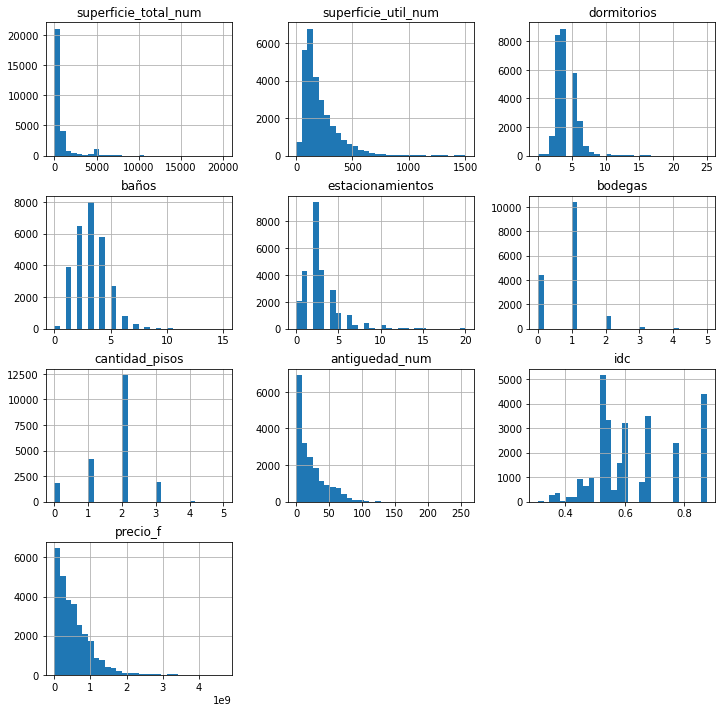

In [287]:
dfc[var_numtp_obj].hist(bins=30, figsize=(12,12))
plt.show()

### Variables binarias

En general, casi todas las variables binarias presentan un grado de desbalance hacia el **'No'** o 0 (clase negativa), a excepción de piscina y terraza.

In [288]:
var_bin = ['condominio_cerrado', 'quincho', 'piscina', 'terraza', 'mansarda', 'gas_natural', 
                'generador_electrico', 'energia_solar', 'caldera', 'jacuzzi', 'ascensor', 'c_basquetbol',
                'c_futbol', 'c_paddle', 'c_tenis', 'c_polideportiva', 'salon_fiestas', 'amoblado']
dfc[var_bin].describe()

,condominio_cerrado,quincho,piscina,terraza,mansarda,gas_natural,generador_electrico,energia_solar,caldera,jacuzzi,ascensor,c_basquetbol,c_futbol,c_paddle,c_tenis,c_polideportiva,salon_fiestas,amoblado
count,8964.000000,19160.000000,20153.000000,21080.000000,15486.000000,16867.000000,8135.000000,8149.000000,8590.000000,15199.000000,7772.000000,7614.000000,7784.000000,7711.000000,7836.000000,7761.000000,8124.000000,10636.000000
mean,0.240629,0.346086,0.489307,0.536575,0.123014,0.401198,0.025937,0.022579,0.148894,0.153102,0.005275,0.008537,0.023124,0.007651,0.018377,0.017652,0.036312,0.019086
std,0.427489,0.475733,0.499898,0.498672,0.328464,0.490155,0.158958,0.148568,0.356005,0.360098,0.072444,0.092006,0.150308,0.087143,0.134318,0.131693,0.187077,0.136834
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


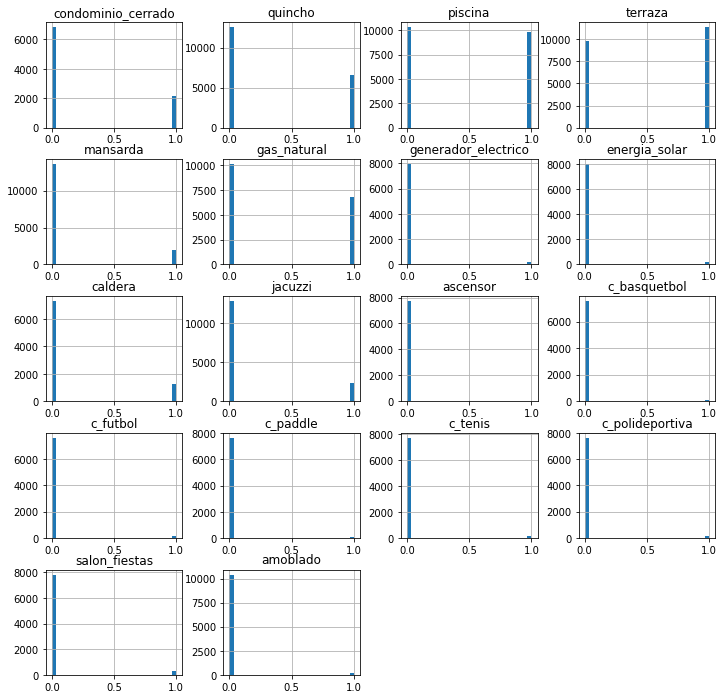

In [289]:
dfc[var_bin].hist(bins=30, figsize=(12,12))
plt.show()

### Variables numericas de información de la zona

Estas variables no presentan anomalías a simple vista, esto se debe a que la página web desde donde se extrajo la información solo mostraba hasta un máximo de 5 amenidades en un radio de 2 kilometros a la redonda.

In [290]:
var_numiz = ['estaciones_metro', 'paraderos', 'jardines_infantiles', 'colegios', 'universidades', 
             'plazas', 'supermercados', 'farmacias', 'centros_comerciales', 'hospitales', 'clinicas']
dfc[var_numiz].describe()

,estaciones_metro,paraderos,jardines_infantiles,colegios,universidades,plazas,supermercados,farmacias,centros_comerciales,hospitales,clinicas
count,28446.000000,28446.000000,28446.000000,28446.000000,28446.000000,28446.000000,28446.000000,28446.000000,28446.000000,28446.000000,28446.000000
mean,0.830205,3.900302,3.005765,3.637875,0.532096,3.425789,2.599627,2.711488,0.647543,0.558989,1.631969
std,1.434255,2.010145,2.195547,1.876226,1.185074,2.002695,2.043637,2.146516,1.062509,1.045838,1.873426
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,5.000000,0.000000,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.000000,4.000000,5.000000,0.000000,5.000000,2.000000,3.000000,0.000000,0.000000,1.000000
75%,1.000000,5.000000,5.000000,5.000000,0.000000,5.000000,5.000000,5.000000,1.000000,1.000000,3.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


Con respecto a las variables de la tabla información de zona se puede concluir lo siguiente:

- Las variables estaciones_metro, universidades, centros_comerciales, hospitales y clinicas presentan una mayoría para el valor cero, lo que indica que son pocas las casas que se encuentran cerca de una de estas amenidades y es lógico, ya que no son muchas por comuna.

- Por el contrario, las variables paraderos, jardines_infantiles, colegios, plazas, supermercados y farmacias presentan una mayoría para el valor cinco, esto quiere decir que la gran mayoría de las casas en venta tiene cerca una de estas amenidades, en teoría son lugares mas comunes y se encuentran en mayor cantidad por comuna.

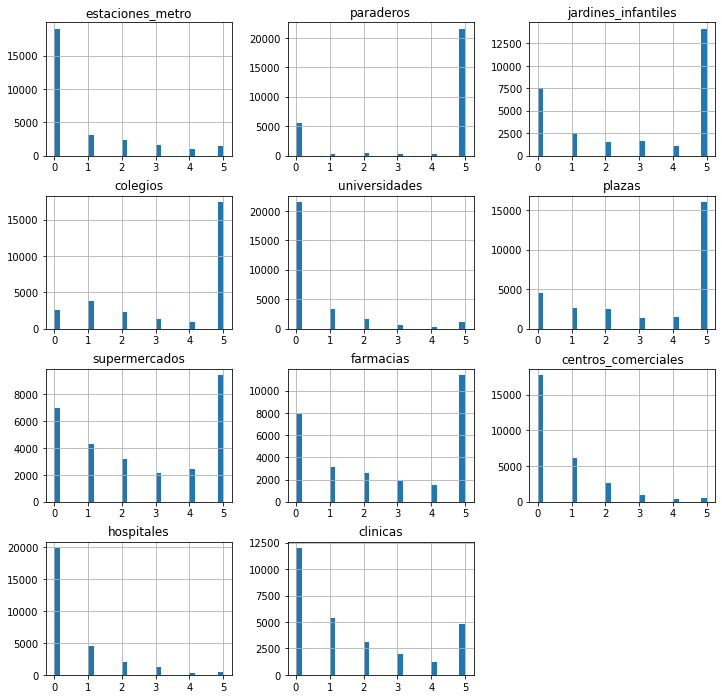

In [291]:
dfc[var_numiz].hist(bins=30, figsize=(12,12))
plt.show()

Antes de seguir con el análisis correspondiente, primero se reemplazan aquellos valores que no pueden ser ceros por nulos en las columnas superficie_total_num, superficie_util_num, dormitorios, baños y cantidad_pisos.

In [297]:
# Variables con valores nulos
var_nulos = ['superficie_total_num', 'superficie_util_num', 'dormitorios', 'baños', 'cantidad_pisos']

# Los valores cero son reemplazados por np.NaN
dfc[var_nulos] = dfc[var_nulos].replace(0, np.NaN)

Nuevamente se vuelven a generar los casos en donde la superficie total y la superficie útil son nulas, entonces, se procederá de la misma manera que se hizo anteriormente, es decir, se eliminan las filas que tengan ambas variables nulas.

In [298]:
dfc = dfc.drop(dfc.loc[(dfc['superficie_total_num'].isna()) & (dfc['superficie_util_num'].isna())].index, axis = 0)

Se verifica que no existan variables con valores únicos.

In [299]:
dfc.nunique()

comuna                    50
barrio                   335
dormitorios               25
baños                     14
estacionamientos          21
bodegas                    6
cantidad_pisos             5
condominio_cerrado         2
quincho                    2
piscina                    2
terraza                    2
mansarda                   2
gas_natural                2
generador_electrico        2
energia_solar              2
caldera                    2
jacuzzi                    2
ascensor                   2
c_basquetbol               2
c_futbol                   2
c_paddle                   2
c_tenis                    2
c_polideportiva            2
salon_fiestas              2
amoblado                   2
estaciones_metro           6
paraderos                  6
jardines_infantiles        6
colegios                   6
universidades              6
plazas                     6
supermercados              6
farmacias                  6
centros_comerciales        6
hospitales    

## Identificación y eliminación de outliers

Debido a la cantidad de datos considerados anormales, se estima prudente identificar y eliminar los valores outliers antes de realizar la división de la data, ya que, existe la posibilidad de que los outliers se concentren en uno de los dos conjuntos de entrenamiento o prueba. Por ende, se define una función para cuantificar la cantidad de outliers, en donde se utiliza el criterio del rango intercuartil (IQR), el cual consiste en determinar que datos son mayores al percentil 75 más 1.5 veces IQR o menores al percentil 25 menos 1.5 veces IQR. 

Para este caso en particular, se decide considerar un criterio un poco mas conservador, es decir, se toma en cuenta un valor de 2 veces el IQR para determinar los límites con los cuales se clasifica un outlier, esto se hace con el fin de no borrar demasiados datos del conjunto.

In [300]:
# Función para determinar la cantidad de outliers
def outliers_t(df, variables, factor):
    for var in variables:
        Q1 = df[var].quantile(0.25)
        Q3 = df[var].quantile(0.75)
        IQR = Q3 - Q1
        lower, upper = Q1 - IQR * factor, Q3 + IQR * factor
        outlier = [x for x in df[var] if x < lower or x > upper]
        print('Cantidad de outliers de la variable',var, len(outlier),'inferior :', lower, 'superior :', upper)

Se cuantifica la cantidad de valores atípicos de todas las variables numéricas de tabla principal más la variable objetivo.

No se cuantifican los valores atípicos de las variables de tabla info zona porque solo pueden tomar valores de 0 a 5.

In [301]:
var_numtp_obj = var_numtp + [var_obj]
outliers_t(dfc, var_numtp_obj, 1.5)

Cantidad de outliers de la variable superficie_total_num 3035 inferior : -625.0 superior : 1495.0
Cantidad de outliers de la variable superficie_util_num 1368 inferior : -136.5 superior : 507.5
Cantidad de outliers de la variable dormitorios 354 inferior : 0.0 superior : 8.0
Cantidad de outliers de la variable baños 205 inferior : -1.0 superior : 7.0
Cantidad de outliers de la variable estacionamientos 5400 inferior : 0.5 superior : 4.5
Cantidad de outliers de la variable bodegas 218 inferior : -1.5 superior : 2.5
Cantidad de outliers de la variable cantidad_pisos 6179 inferior : 2.0 superior : 2.0
Cantidad de outliers de la variable antiguedad_num 345 inferior : -47.0 superior : 81.0
Cantidad de outliers de la variable idc 0 inferior : 0.28405 superior : 0.91325
Cantidad de outliers de la variable precio_f 812 inferior : -709000000.0 superior : 1635000000.0


Se determina lo siguiente:

- La variable objetivo presente una cantidad relativamente pequeña de valores atípicos en relación al total de instancias.

- Casi todas las variables de la tabla principal presentan valores atípicos a excepción de idc, de las cuales la gran mayoría esta concentrado en las variables cantidad_pisos, estacionamientos y superficie_total_num.

Todos los outliers identificados en las variables de la tabla principal y la variable objetivo serán eliminados a excepción de la variable idc y cantidad_pisos, ya que la primera presenta valores fijos dependiendo de la comuna, aunque según el criterio IQR no presenta valores atípicos y con respecto a la segunda, los límites son iguales, por lo que se pierde mucha información al eliminar estos datos. 

Cabe destacar que solo se considera el límite superior, no se consideran los outliers debajo del límite inferior, ya que, en particular la variable estacionamientos presenta esa cantidad de outliers debido a su límite inferior, que es mayor a 0.

Primero se identifican los índices por variables, de todos los outliers.

In [174]:
import itertools
def outliers_e(df, variables, factor):
    indices = []
    for var in variables:
        Q1 = df[var].quantile(0.25)   
        Q3 = df[var].quantile(0.75)
        IQR = Q3 - Q1
        lower, upper = Q1 - IQR * factor, Q3 + IQR * factor

        #idx_dfc_outlier = dfc.loc[(dfc[var] < lower) | (dfc[var] > upper)].index
        idx_df_outlier = df.loc[(df[var] > upper)].index
        
        print(var, len(idx_df_outlier))
        indices.append(idx_df_outlier)
        
    # Se integran los indices de los datos a eliminar.
    indices_unificados = list(set(itertools.chain(*indices)))
    print('Cantidad total de outliers a eliminar:',len(indices_unificados))
    return indices_unificados

Luego, se unifican las listas de índices de outliers de cada variable en una sola y se eliminan duplicados para posteriormente eliminar los outliers.

In [303]:
# Se definen las variables a las que se le eliminarán los outliers
var_outliers = ['superficie_total_num', 'superficie_util_num', 'dormitorios', 'baños', 'estacionamientos',
               'bodegas', 'antiguedad_num', 'precio_f']

dfcc = dfc.copy()
indices_unificados = outliers_e(dfc, var_outliers, 1.5)
dfc = dfc.drop(indices_unificados, axis = 0)

superficie_total_num 3035
superficie_util_num 1368
dormitorios 354
baños 205
estacionamientos 3417
bodegas 218
antiguedad_num 345
precio_f 812
Cantidad total de outliers a eliminar: 6196


Se han eliminado un total de 6196 outliers del conjunto de datos. Por otra parte, los barrios pasaron de ser 335 a 322.

In [304]:
len(dfc['comuna'].unique()), len(dfc['barrio'].unique())

(50, 322)

# Análisis y exploración de datos

## Creación de datos de prueba

Antes de continuar con un análisis más detallado de los datos, es importante crear conjuntos de datos separados para entrenamiento y prueba. Esto se hace para evitar la filtración de información de los datos de prueba hacia los modelos candidatos antes de tiempo.

Para lograr esto, se ha tomado la decisión de dividir los datos en un 20% para el conjunto de datos de prueba y un 80% para el conjunto de datos de entrenamiento. 

### Estratificación de datos

Para generar una división de datos equilibrada se decide agregar una columna adicional al dataframe, la cual corresponde a la discretización de la variable precio_f, con el fin de tener un conjunto de entrenamiento y prueba estratíficado, para que la representación de los datos sea similar en ambos conjuntos.

<Axes: >

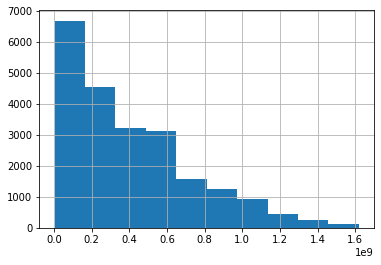

In [305]:
dfc['precio_f'].hist()

Se discretiza la variable precio_f

In [306]:
dfc['precio_f_cat'] = pd.cut(dfc['precio_f'],
                            bins=[0., 150000000, 300000000, 450000000, 600000000, 750000000, 900000000, np.inf],
                            labels=[1, 2, 3, 4, 5, 6, 7])

In [307]:
dfc['precio_f_cat'].value_counts()

precio_f_cat
1    5980
2    4633
4    3030
3    2975
7    2206
5    1982
6    1341
Name: count, dtype: int64

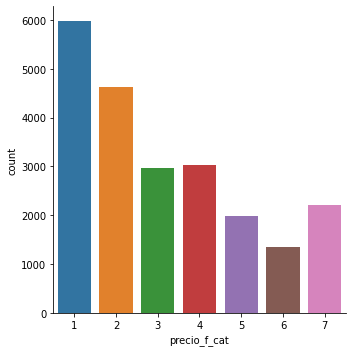

In [308]:
sns.catplot(x='precio_f_cat',data=dfc,kind="count")

### División de la data

Se generan los conjuntos de entrenamiento y prueba estratificados en base a la variable precio_f.

In [309]:
from sklearn.model_selection import train_test_split
# Definición de variables categóricas
var_cats = ['comuna', 'barrio']

# Defición de variables predictoras
var_pred = [var for var in (var_numtp + var_numiz  + var_bin + var_cats)]

In [310]:
def division_data(df, test_size, stratify, var_pred, var_obj):
    # Creación del conjunto de datos de entrenamiento y prueba
    if stratify is not None:
        train, test = train_test_split(df, test_size=test_size, stratify=df[stratify], random_state=15)
    else:
        train, test = train_test_split(df, test_size=test_size, random_state=15)
    
    # Separación de las variables predictoras del objetivo
    train_X = train[var_pred]
    train_y = train[var_obj]
    test_X = test[var_pred] 
    test_y = test[var_obj]
    
    return train_X, train_y, test_X, test_y, train, test

In [311]:
train_X, train_y, test_X, test_y, train, test = division_data(dfc, 0.2, 'precio_f_cat', var_pred, var_obj)

## Análisis univariado

Se realiza la visualización de los datos mediante distintos tipos de gráficos para observar su comportamiento e identificar datos atípicos.

### Variables categóricas

Para la variable comuna, la gran mayoría de datos proviene de las comunas de las condes, lo barnechea, colina, puente alto, maipu y vitacura. Por otra parte, la variable barrio puede tomar demasiados valores, por lo que no es factible su visualización ni agrupación.

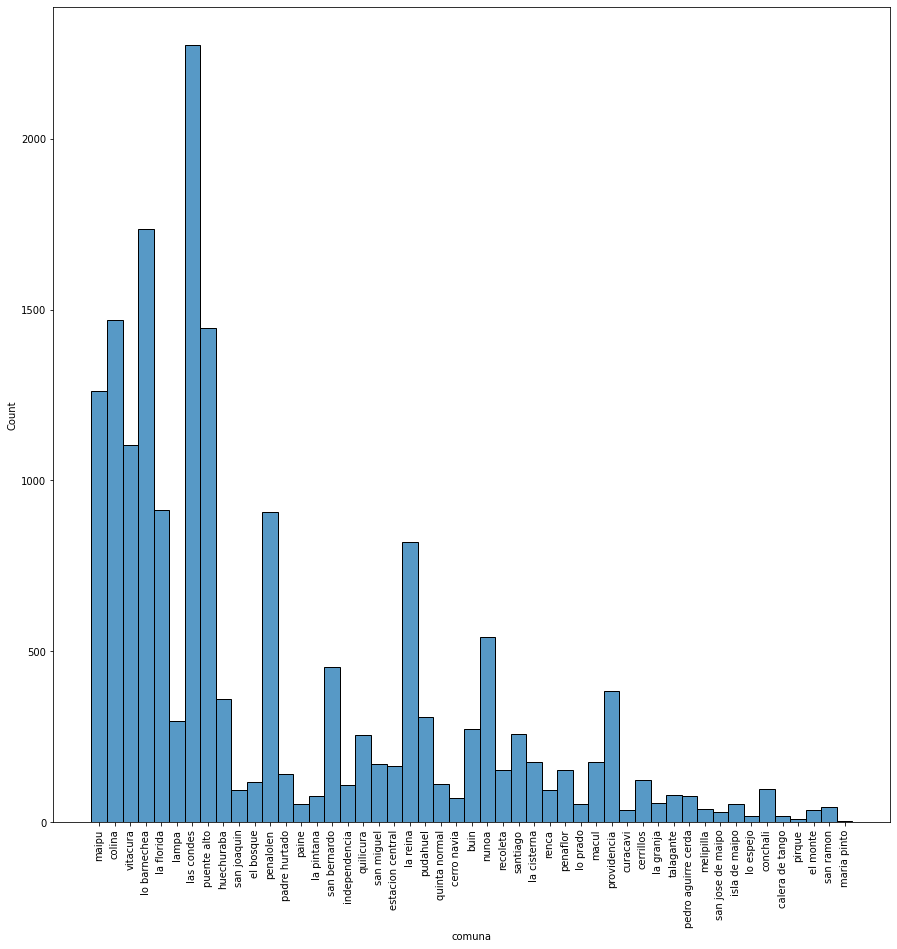

In [103]:
plt.figure(figsize=(15, 15))
sns.histplot(train['comuna'], kde=False)
plt.xticks(rotation=90)
plt.show()

Además, en los datos de entrenamiento hay 49 comunas y 315 barrios, lo que indica que hay 1 comuna y 7 barrios que se encuentran solo en el conjunto de datos de entrenamiento.

In [314]:
len(train['comuna'].unique()), len(train['barrio'].unique())

(49, 315)

### Identificación de outliers

Mediante los diagramas de caja (Box plots) se determinara la cantidad de datos atípicos para la variable objetivo y para las variables numéricas en el conjunto de entrenamiento.

#### Variable objetivo 

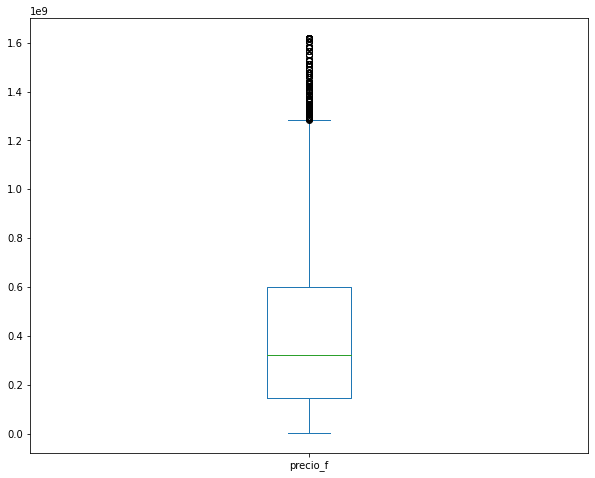

In [315]:
train_y.plot(kind='box', figsize=(10,8))
plt.show()

En base al diagrama de caja de la variable objetivo se puede ver que está cuenta con outliers.

#### Variables numéricas tabla principal e idc

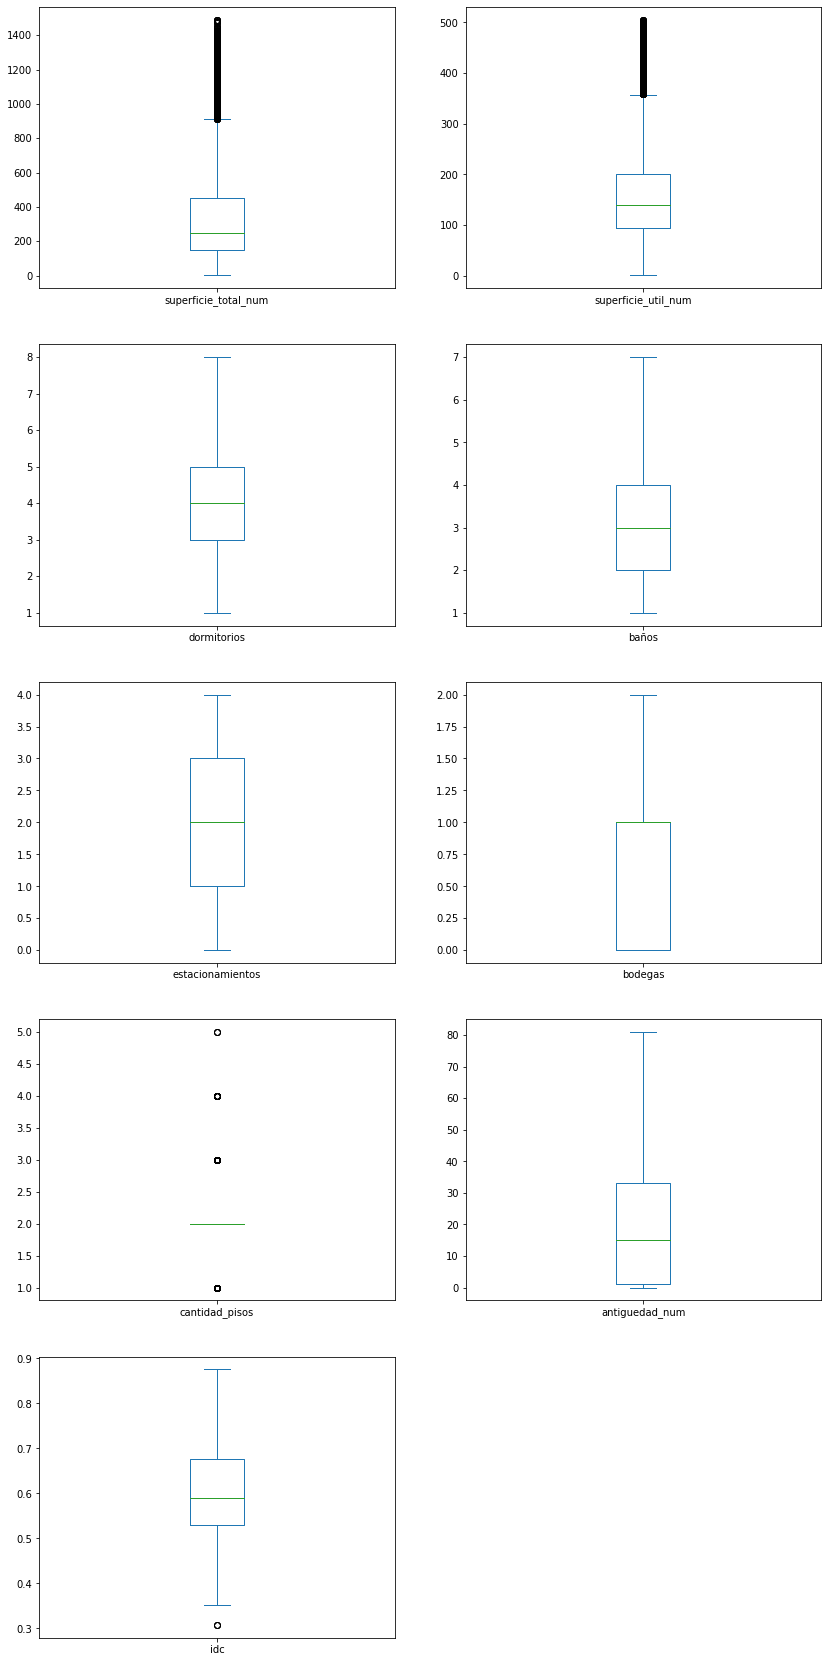

In [316]:
train[var_numtp].plot(kind='box', subplots=True, layout=(5,2), figsize=(14,30))
plt.show()

Las variables superficie_total_num, superficie_util_num, cantidad_pisos e idc presentan valores atípicos en el conjunto de entrenamiento. Para el caso de cantidad_pisos, los datos están concentrados en el valor 2.

#### Variables numéricas tabla información de la zona

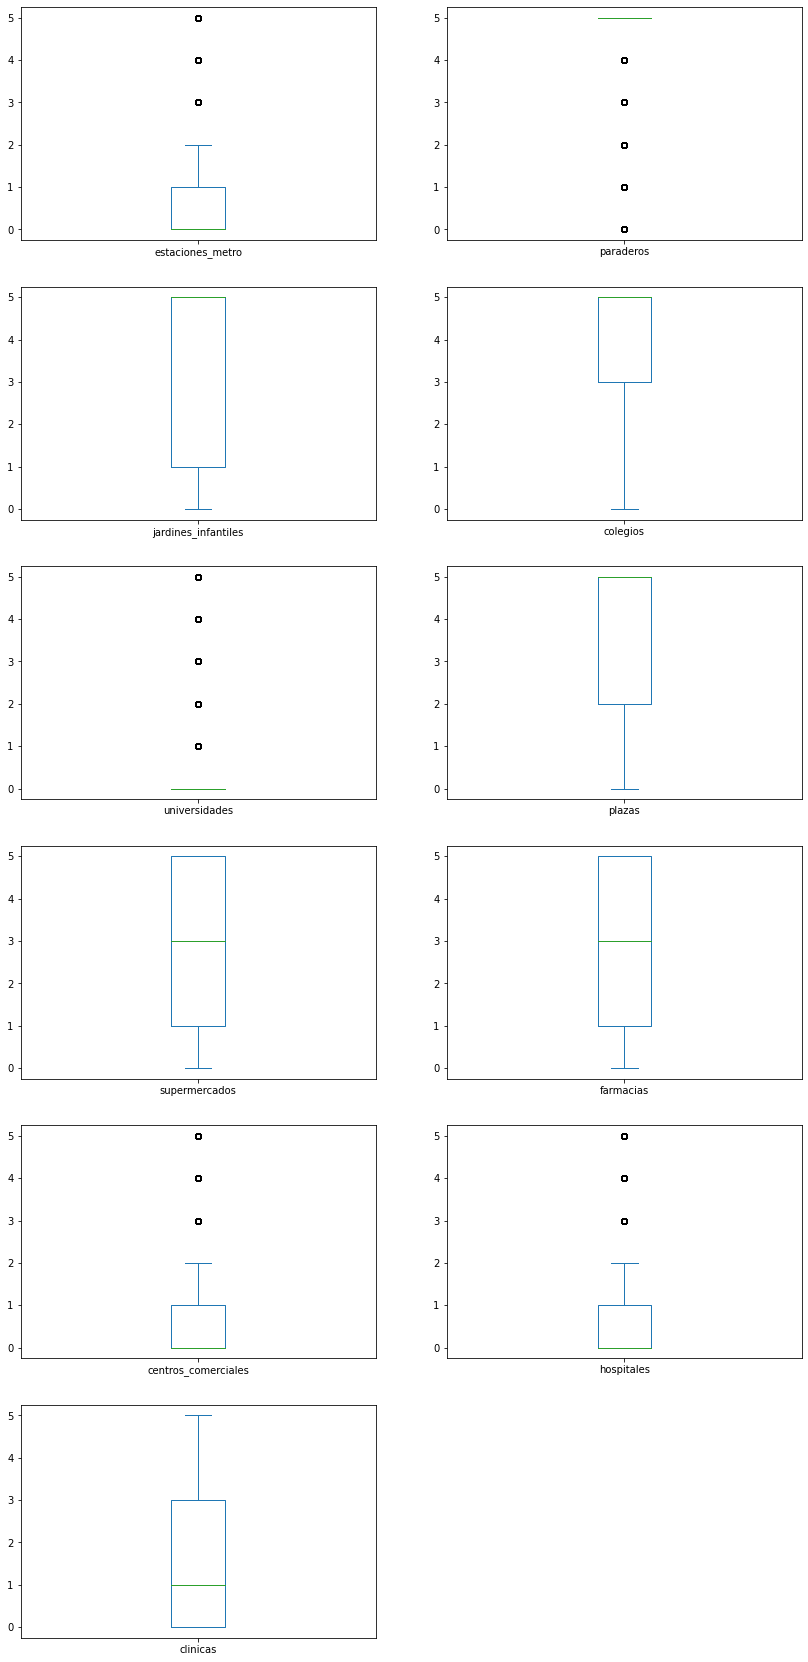

In [317]:
train[var_numiz].plot(kind='box', subplots=True, layout=(6,2), figsize=(14,30))
plt.show()

Para este caso el diagrama de caja no es un buen indicador para visualizar los outliers que posee cada variable, ya que, como se dijo anteriormente solo pueden tomar valores enteros entre el valor 0 y 5.

Se cuantifica la cantidad de valores atípicos de todas las variables numéricas más la variable objetivo en el conjunto de entrenamiento.

In [318]:
outliers_t(train, var_numtp_obj, 1.5)

Cantidad de outliers de la variable superficie_total_num 1044 inferior : -309.5 superior : 910.5
Cantidad de outliers de la variable superficie_util_num 798 inferior : -62.5 superior : 357.5
Cantidad de outliers de la variable dormitorios 0 inferior : 0.0 superior : 8.0
Cantidad de outliers de la variable baños 0 inferior : -1.0 superior : 7.0
Cantidad de outliers de la variable estacionamientos 0 inferior : -2.0 superior : 6.0
Cantidad de outliers de la variable bodegas 0 inferior : -1.5 superior : 2.5
Cantidad de outliers de la variable cantidad_pisos 3862 inferior : 2.0 superior : 2.0
Cantidad de outliers de la variable antiguedad_num 0 inferior : -47.0 superior : 81.0
Cantidad de outliers de la variable idc 3 inferior : 0.3088000000000001 superior : 0.8984
Cantidad de outliers de la variable precio_f 332 inferior : -539100000.0 superior : 1282500000.0


En el conjunto de entrenamiento existe una cantidad relativamente baja de valores atípicos en comparación al tamaño del conjunto. La variable que presenta mayor cantidad de outliers es cantidad_pisos pero como se dijo anteriormente, los datos están muy concentrados en el 2.

## Análisis bivariado

El objetivo del análisis es determinar si existen relaciones entre los distintos tipos de variables.

### Matriz de correlaciones

#### Variables numéricas tabla principal e idc

La matriz de correlaciones **Pearson** indica lo siguiente:

- Se considera que existen 2 variables que tienen una correlación lineal positiva alta con la variable objetivo, las cuales son superficie_util_num y superficie_total_num, también tiene 4 variables con una correlación lineal positiva media alta, las caules son baños, idc, dormitorios y estacionamientos.

- Las variables superficie_total_num, superficie_util_num, dormitorios y baños presentan una correlación lineal positiva medianamente alta entre ellas.

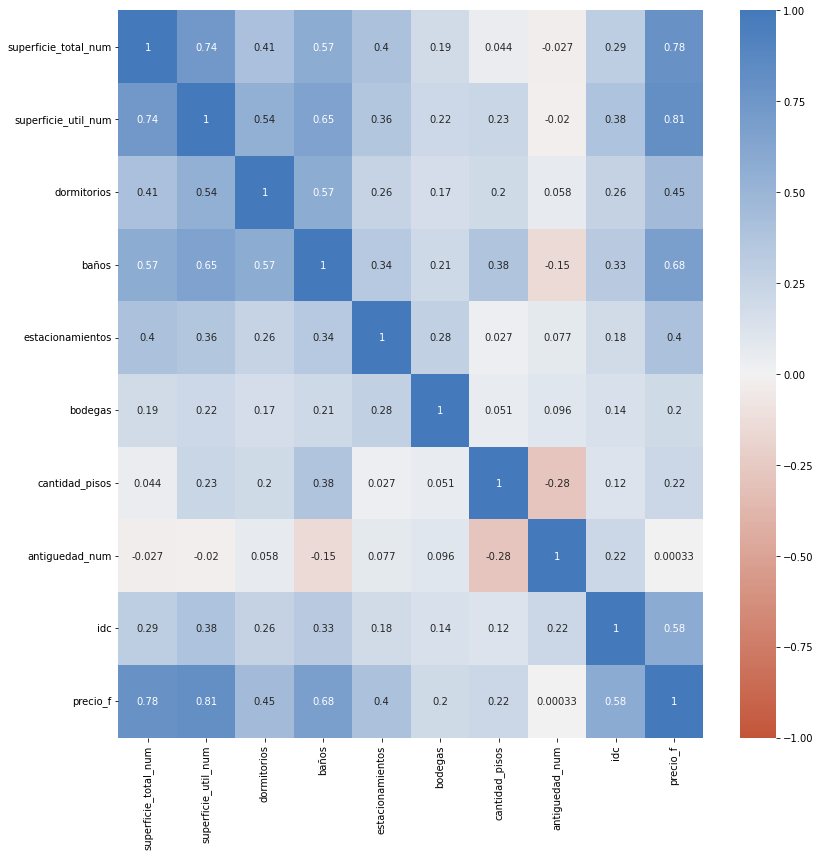

In [319]:
# Correlación de pearson entre variables numéricas y variable objetivo
fig, ax = plt.subplots(figsize=(12, 12))
ax = sns.heatmap(train[var_numtp_obj].corr(), vmin=-1, vmax=1, annot=True, 
                 cmap=sns.diverging_palette(20, 250, as_cmap=True),
                 ax=ax)

plt.tight_layout()
plt.show()

La matriz de correlaciones **Spearman** indica lo siguiente:

- Se tiene un coeficiente de Spearman alto entre la variable objetivo y las variables superficie_total_num, superficie_util_num y baños, lo que indica que existe una correlación fuerte y positiva, esto quiere decir que a medida que aumentán los valores de una de estas variables también aumenta los valores de la variable objetivo de manera consistente, además se tiene una correlación medianamente fuerte y positiva con las variables idc, dormitorios y estacionamientos.

- Las variables numéricas superficie_total_num, superficie_util_num, baños y dormitorios presentan un coeficiente de spearman relativamente alto entre ellas, destancando una correlación fuerte y positiva entre las variables relacionadas a la superficie.

Cabe destacar que se llega a una conclusión similar con ambos coeficientes (Pearson y Spearman)

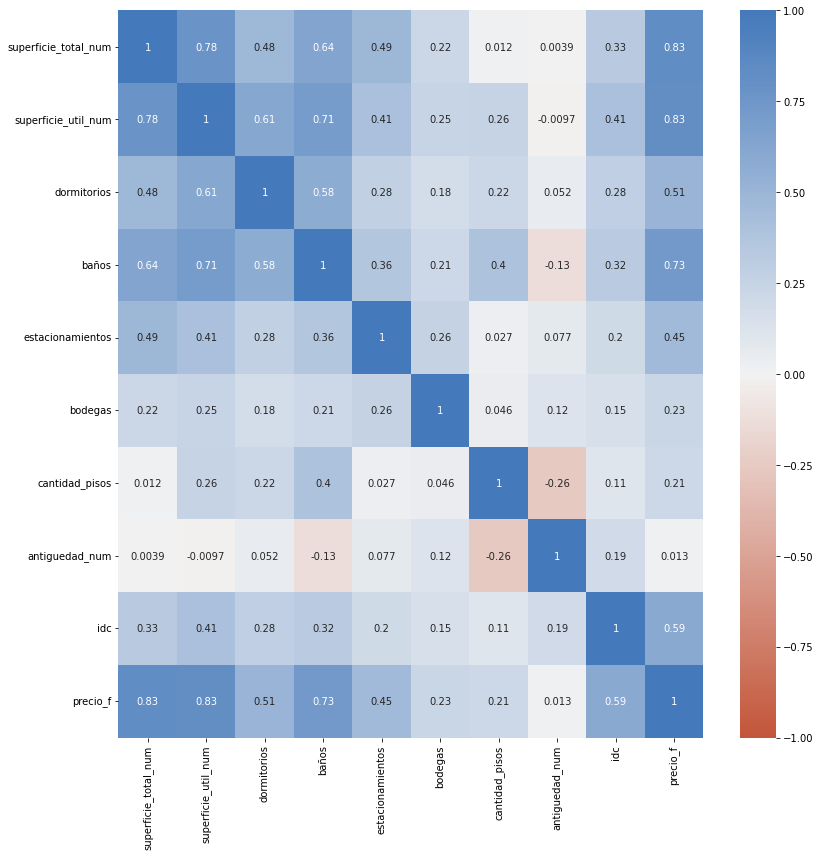

In [320]:
# Correlación de spearman entre variables numéricas y variable objetivo
fig, ax = plt.subplots(figsize=(12, 12))
ax = sns.heatmap(train[var_numtp_obj].corr(method='spearman'), vmin=-1, vmax=1, annot=True, 
                 cmap=sns.diverging_palette(20, 250, as_cmap=True),
                 ax=ax)

plt.tight_layout()
plt.show()

#### Variables numéricas información de la zona

La matriz de correlaciones **Pearson** indica lo siguiente:

- La variable objetivo solo presenta relaciones negativas o nulas con las demas variables, destacando las variables jardines_infantiles, colegios y supermercados, ya que poseen una correlación lineal negativa media con la variable objetivo.

- Por contraparte, las variables presentan entre si una correlación lineal positiva relativamente alta entre varias variables. 

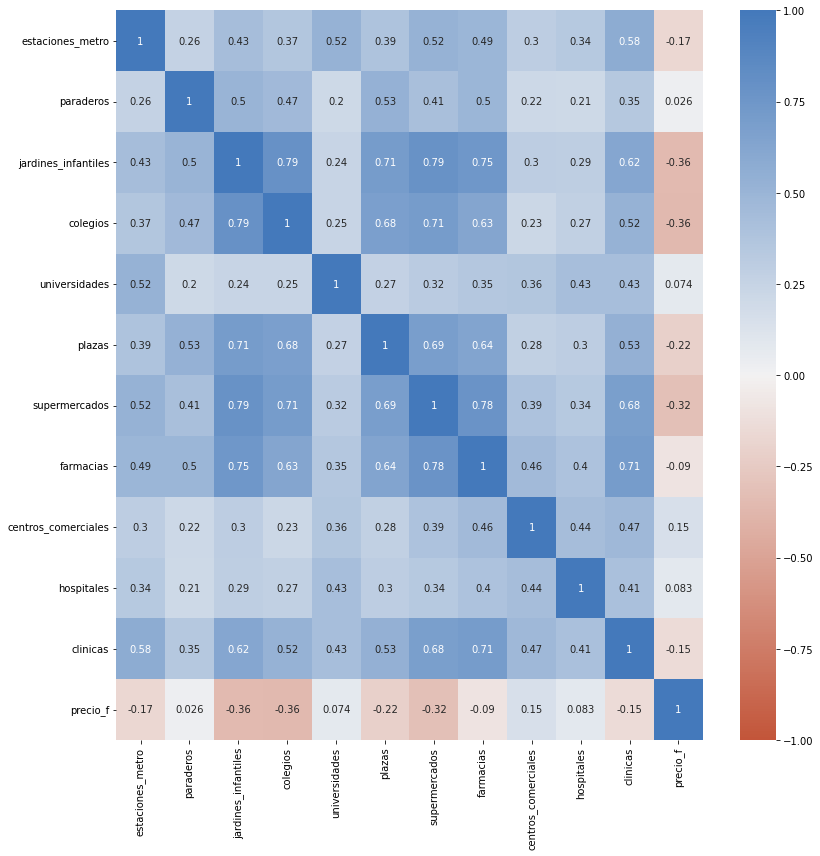

In [322]:
# Correlación entre variables info zona con variable objetivo
var_numiz_obj = var_numiz + [var_obj]
fig, ax = plt.subplots(figsize=(12, 12))
ax = sns.heatmap(train[var_numiz_obj].corr(), vmin=-1, vmax=1, annot=True, 
                 cmap=sns.diverging_palette(20, 250, as_cmap=True),
                 ax=ax)

plt.tight_layout()
plt.show()

La matriz de correlaciones de **Spearman** indica la mismas relaciones en general, con una magnitud bastante similar entre la correlación de las variables.

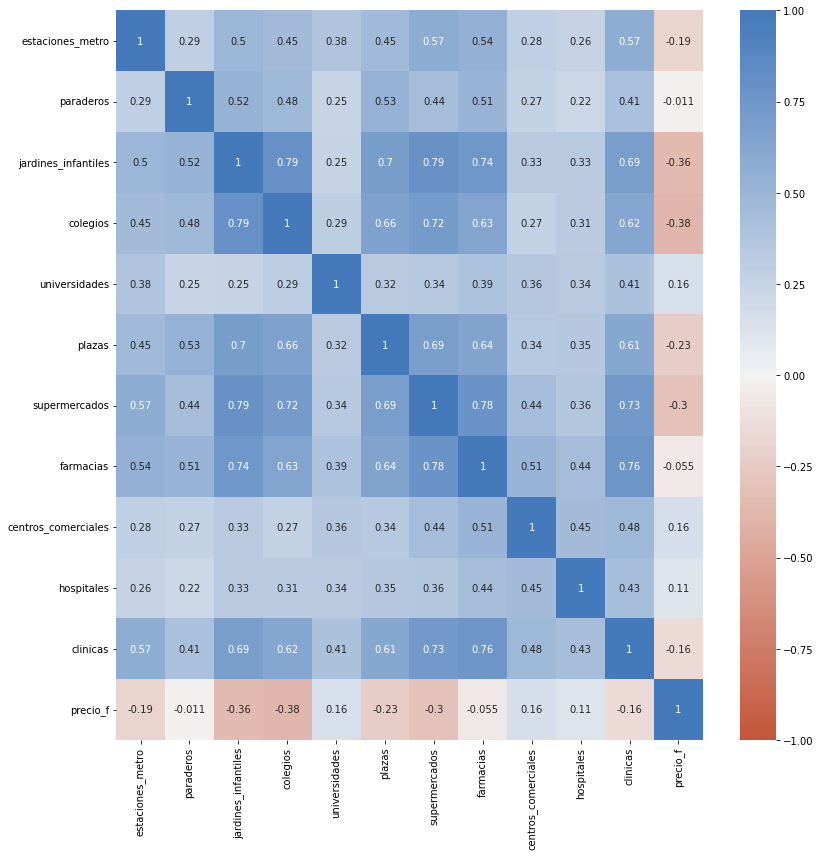

In [323]:
# Correlación de spearman entre variables numéricas y variable objetivo
fig, ax = plt.subplots(figsize=(12, 12))
ax = sns.heatmap(train[var_numiz_obj].corr(method='spearman'), vmin=-1, vmax=1, annot=True, 
                 cmap=sns.diverging_palette(20, 250, as_cmap=True),
                 ax=ax)

plt.tight_layout()
plt.show()

### Variable objetivo vs variables numéricas tabla principal e idc

En estos gráficos es posible ver las correlaciones antes mencionadas, en donde destaca la relación entre superficie_total_num, superficie_util_num y precio_f, ya que claramente poseen una correlación lineal positiva. 

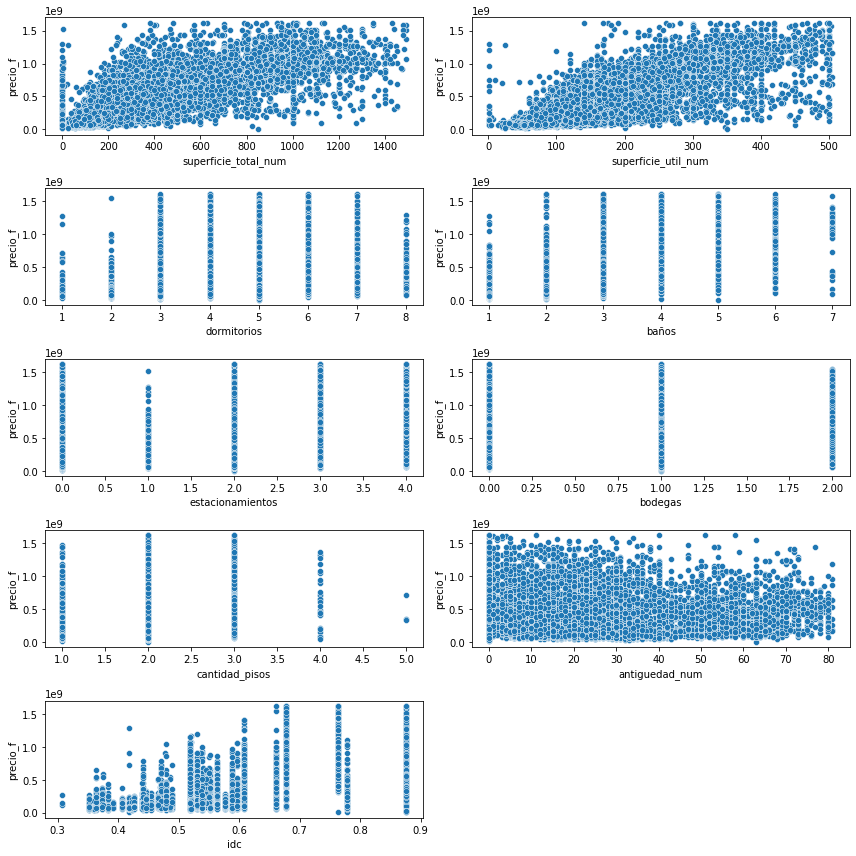

In [324]:
# Obtener el número de variables numéricas
num_var_numtp = len(var_numtp)

# Calcular el número de filas y columnas para la cuadrícula de subplots
num_filas = math.ceil(num_var_numtp / 2)
num_columnas = min(num_var_numtp, 2)

# Crear la cuadrícula de subplots
fig, axes = plt.subplots(num_filas, num_columnas, figsize=(12, 12))

# Iterar sobre los pares de variables y generar los gráficos de dispersión
for idx, (x_var, y_var) in enumerate(zip(var_numtp, [var_obj] * num_var_numtp)):
    row = idx // num_columnas
    col = idx % num_columnas
    ax = axes[row, col]
    sns.scatterplot(x=x_var, y=y_var, data=train, ax=ax)

# Eliminar el último gráfico adicional si el número de variables es impar
if num_var_numtp % 2 != 0:
    fig.delaxes(axes[num_filas - 1, num_columnas - 1])

# Ajustar los espacios entre subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()

### Variable objetivo vs variables de información zona (amenidades)

#### Gráfico de barras

Según los gráficos de barra realizados, se concluye lo siguiente:

- A medida que aumenta la cantidad de jardines_infantiles, colegios, plazas, supermercados y clinicas (esta última en menor medida) cercanos a la casa, el valor de esta disminuye.

- Por otra parte, a medida que aumenta la cantidad de centros_comerciales aumenta el valor de las casas cercanas.

- Para el resto de variables no hay una relación lineal clara, pero se puede decir lo siguiente:
    - El precio de una casa cuando la variable estaciones_metro toma un valor cero es bastante alto, y mientras va aumentando la cantidad de estaciones aumenta el precio. 
    - El precio de la casa va en aumento mientras mas paraderos cercanos tenga, pero disminuye drásticamente cuando son 5 paraderos.
    - No hay una relación clara entre cantidad de universidades, farmacias y hospitales cercanos con el precio de la casa.
  
Cabe destacar que es probable que otras variables influyen en el precio de la casa y presentan algun tipo de relación con estas variables de la información de la zona, por ejemplo, un barrio alejado de la ciudad puede presentar un precio alto de casas y esta lejos de amenidades como estaciones de metro, lo que podría explicar el comportamiento de estas variables.

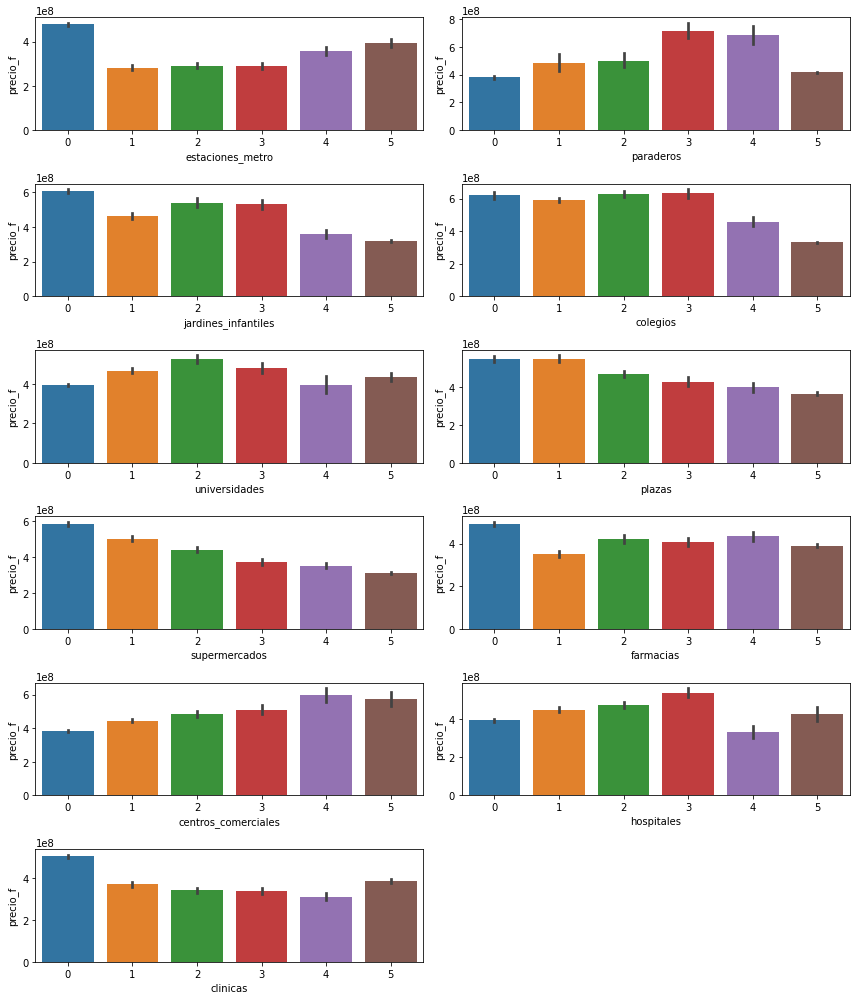

In [325]:
# Calcular el número de filas y columnas necesarias para la cuadrícula
num_vars = len(var_numiz)
num_rows = math.ceil(num_vars / 2)
num_cols = 2

# Crear la cuadrícula de subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 14))

# Iterar sobre los pares de variables y generar los gráficos de dispersión
for idx, (x_var, y_var) in enumerate(zip(var_numiz, [var_obj] * num_vars)):
    row = idx // num_cols
    col = idx % num_cols
    ax = axes[row, col]
    sns.barplot(x=x_var, y=y_var, data=train, ax=ax)

# Eliminar el último gráfico vacío si el número de variables es impar
if num_vars % 2 != 0:
    fig.delaxes(axes[num_rows - 1, num_cols - 1])

# Ajustar los espacios entre subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()

### Variable objetivo vs variables categóricas

En este punto se compara la variable objetivo precio_f con las variables categóricas comuna y barrio.

#### Variable comuna

De este gráfico es posible concluir que las casas con mayor valor se encuentran en las comunas de *Lo Barnechea*, *Vitacura*, *Las Condes*, *Providencia* y *la reina*.

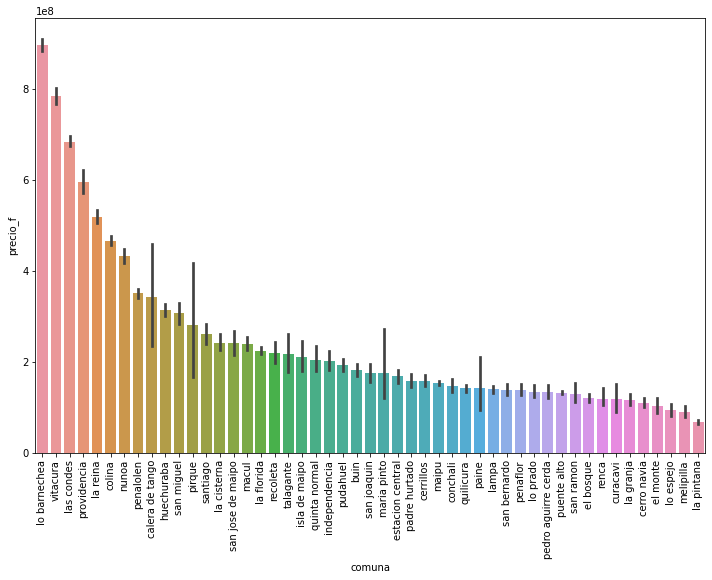

In [326]:
plt.figure(figsize=(12, 8))
ordered_data = train.groupby('comuna')[var_obj].mean().sort_values(ascending=False).index
sns.barplot(x='comuna', y=train[var_obj], data=train, order=ordered_data)
plt.xticks(rotation=90)
plt.show()

#### Variable barrio

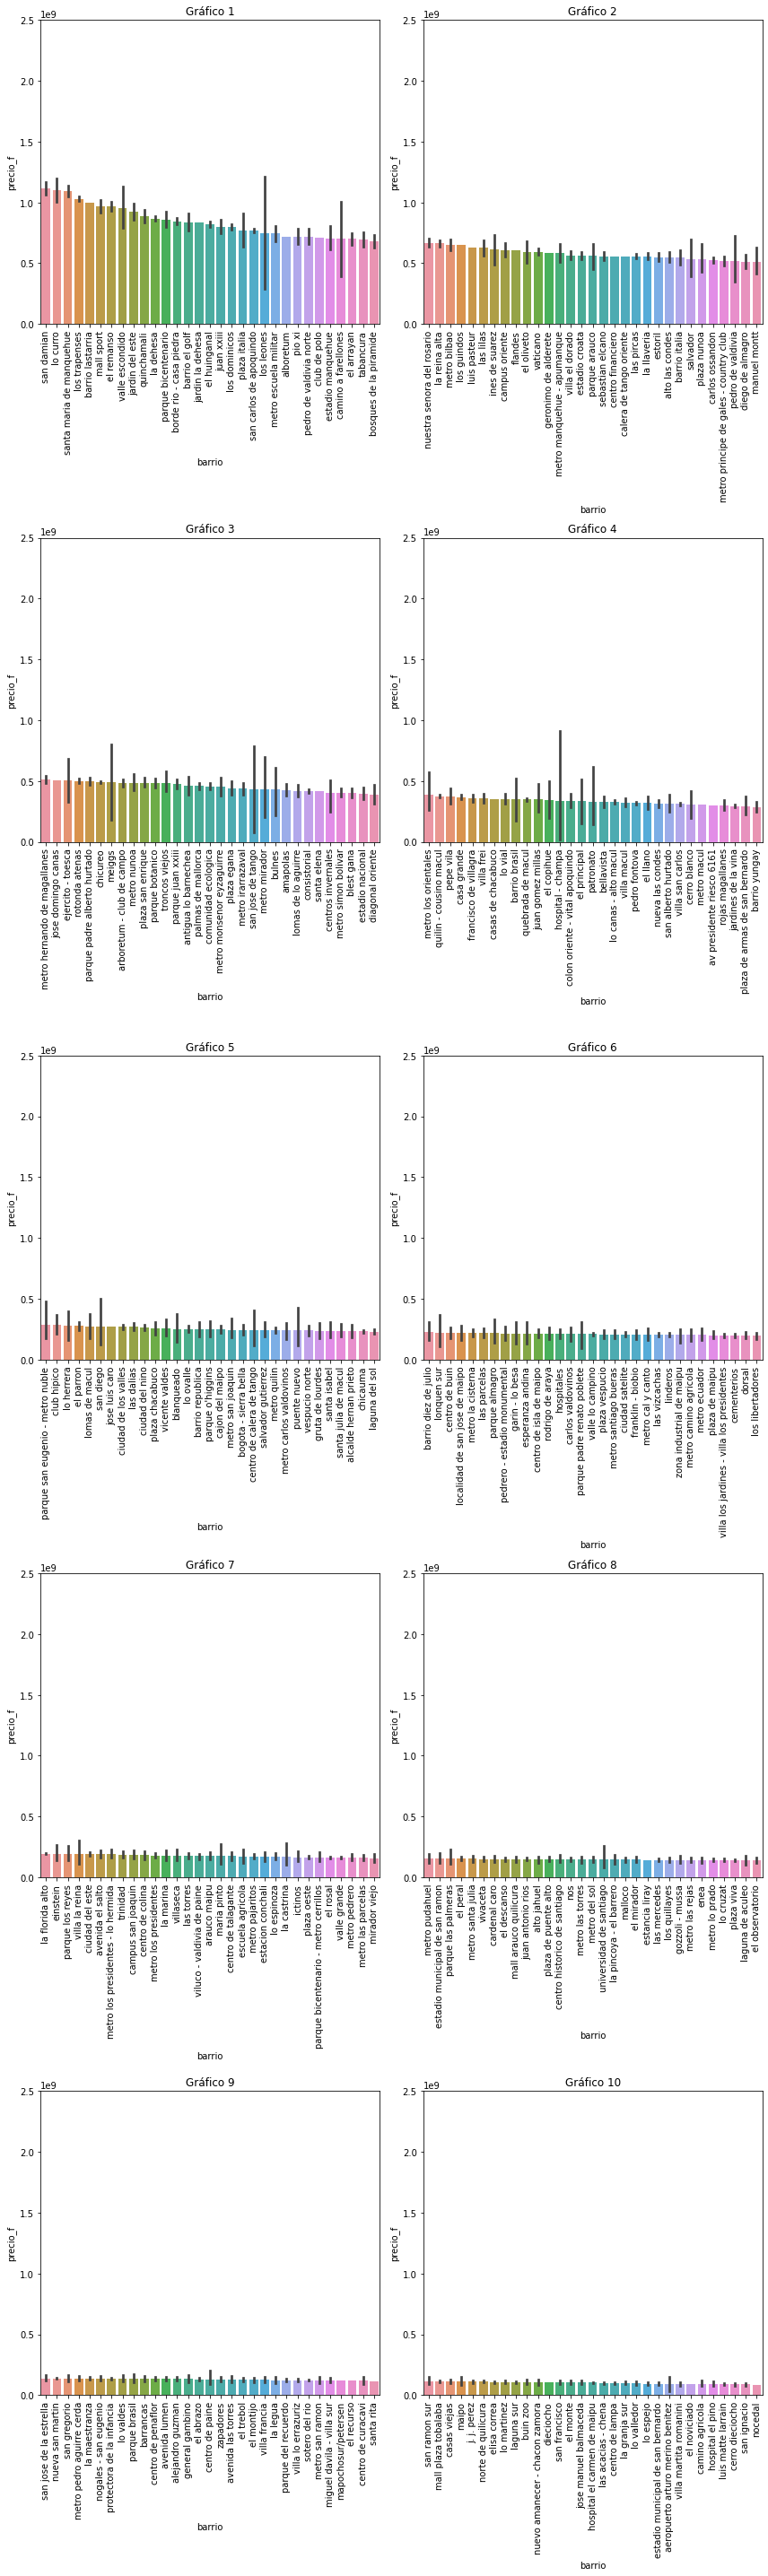

In [327]:
plt.figure(figsize=(12, 40))  # Tamaño total del gráfico

# Obtener las comunas ordenadas por la variable objetivo
ordered_data = train.groupby('barrio')[var_obj].mean().sort_values(ascending=False).index

num_plots = 10  # Número de gráficos a mostrar
rows = num_plots // 2 # Número de filas
cols = 2# Número de columnas
communities_per_plot = len(ordered_data) // num_plots  # Cantidad de comunas por gráfico

for i in range(num_plots):
    start_idx = i * communities_per_plot
    end_idx = (i + 1) * communities_per_plot
    
    # Crear una subparcela en la cuadrícula de 5 filas y 1 columna
    plt.subplot(rows, cols, i+1)
    
    # Generar el gráfico de barras para el grupo de comunas correspondiente
    sns.barplot(x='barrio', y=train[var_obj], data=train[train['barrio'].isin(ordered_data[start_idx:end_idx])], order=ordered_data[start_idx:end_idx])
    plt.xticks(rotation=90)
    plt.ylabel('precio_f') 
    plt.title(f'Gráfico {i+1}') 
    plt.ylim(0, 2500000000)
    
plt.tight_layout()  # Ajustar el espaciado entre las subparcelas
plt.show()

Dentro de los 10 primeros barrios con mayor valor, 9 corresponden a las comunas con mayor a excepción del barrio lastarria, el cual corresponde a la comuna de Santiago, por lo que se puede inferir que el barrio podría ser una variable mucho mas determinante para pronósticar el precio de una casa que la propia comuna. De todas formas, ambas estan relacionadas, lo que implica que la inclusión de una variable al modelo debiese bastar para explicar la información de ambas.

In [329]:
dic_comuna_barrio = {}

for comuna in dfc['comuna'].unique():
    barrios = dfc.loc[dfc['comuna'] == comuna, 'barrio'].unique()
    dic_comuna_barrio[comuna] = list(barrios)
    
for barrio in train.groupby('barrio')[var_obj].mean().sort_values(ascending=False).index[:10]:
    for comuna, barrios in dic_comuna_barrio.items():
        if barrio in barrios:
            print(comuna,'-', barrio)

las condes - san damian
vitacura - lo curro
vitacura - santa maria de manquehue
lo barnechea - los trapenses
santiago - barrio lastarria
las condes - mall sport
las condes - el remanso
lo barnechea - valle escondido
vitacura - jardin del este
las condes - quinchamali


### Variable objetivo vs variables binarias

En este punto se comparan las variables binarias con la variable objetivo.

Se puede concluir lo siguiente:

- Las variables piscina, caldera y jacuzzi tienen una tendencia clara a aumentar el precio de la casa si es que están disponibles. También las variables quincho y terraza presentan una tendencia a aumentar el precio pero en menor medida.

- Las variables c_basquetbol y c_polideportiva tienen una tendencia a disminuir el precio de la casa si esta disponible.

- El resto de variables no muestra una tendencia clara a aumentar o disminuir el precio de manera considerable, además se debe tener en cuenta la gran cantidad de outliers presentes por categoría.

Por último, se debe tener presente que las variables binarias en general presentan una gran cantidad de nulos.

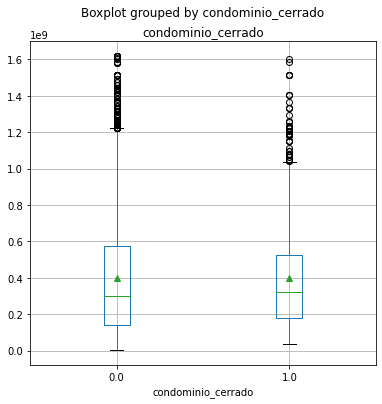

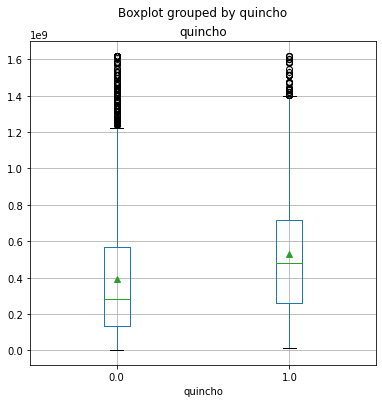

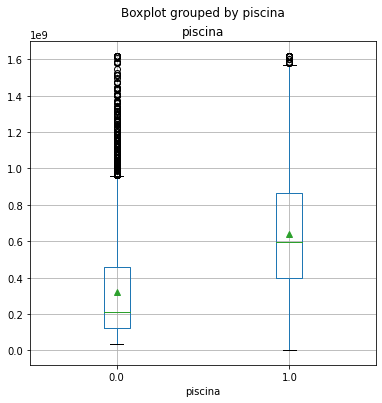

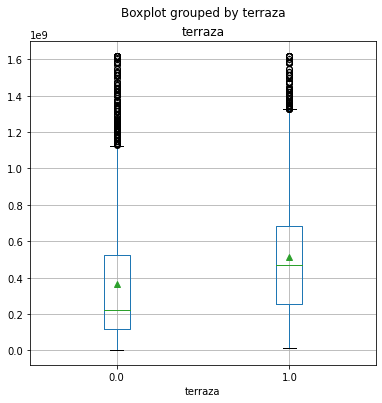

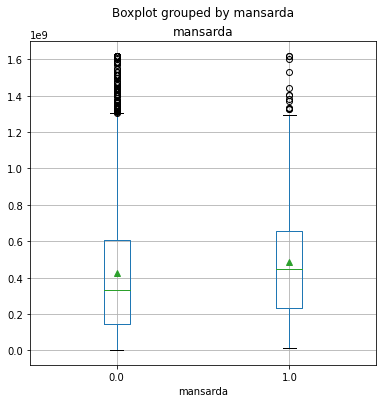

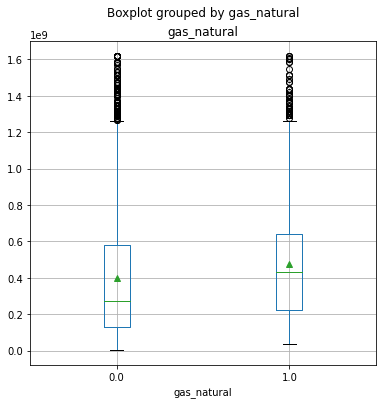

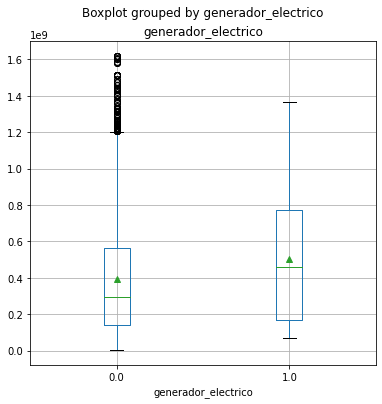

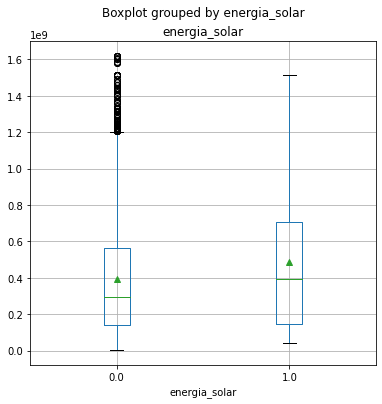

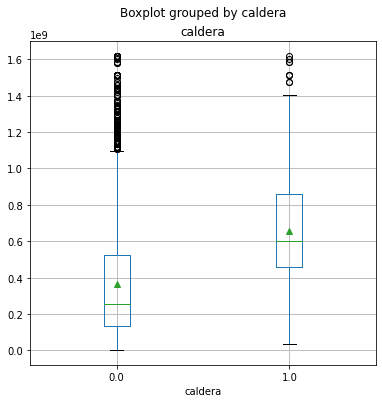

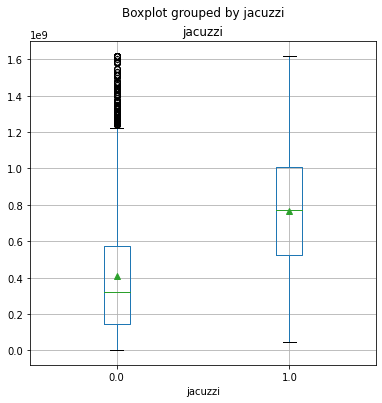

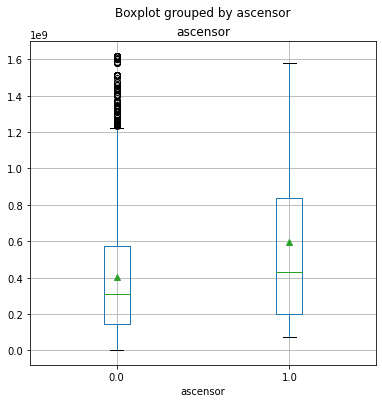

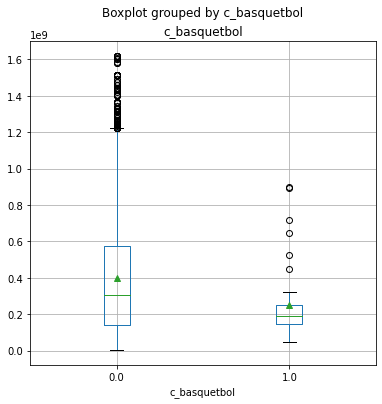

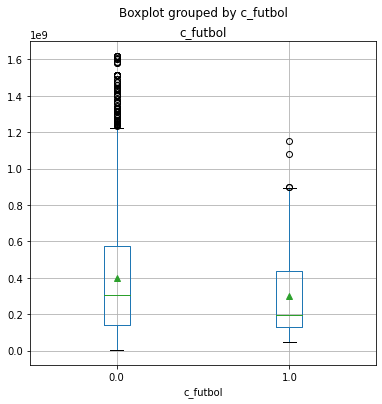

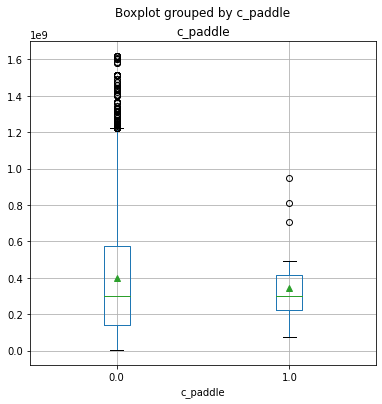

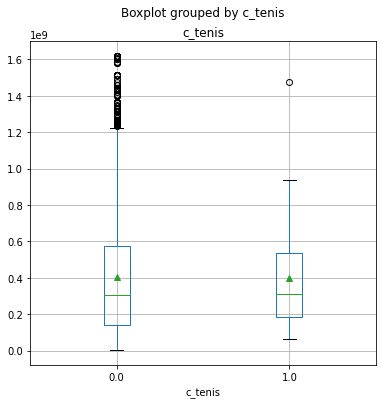

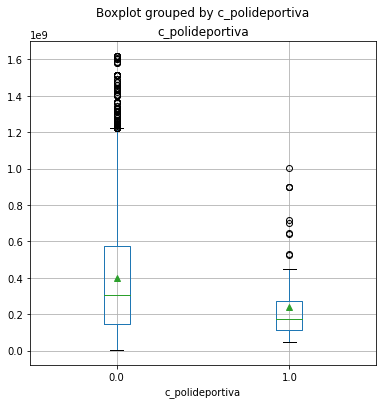

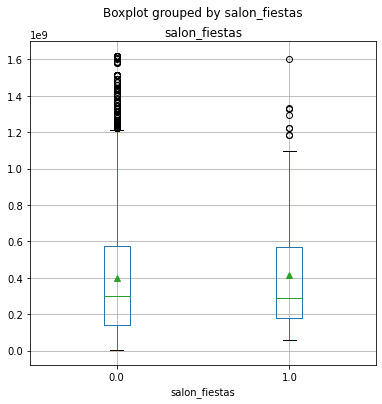

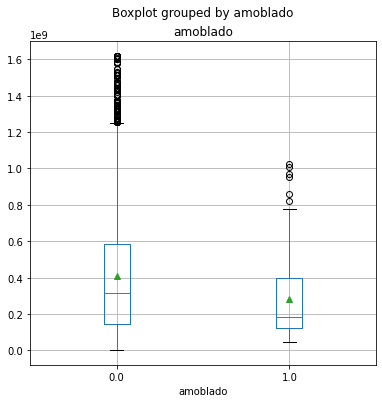

In [331]:
for var in var_bin:
    train.boxplot(column = 'precio_f', by = var, showmeans=True, figsize =(6,6))
    plt.title(var)
plt.show()

### Variables numéricas tabla principal e idc vs variables categóricas

En este punto se comparan las variables numéricas de la tabla principal con la variable categórica comuna. La variable barrio no se considera debido a la gran cantidad de categorías que posee.

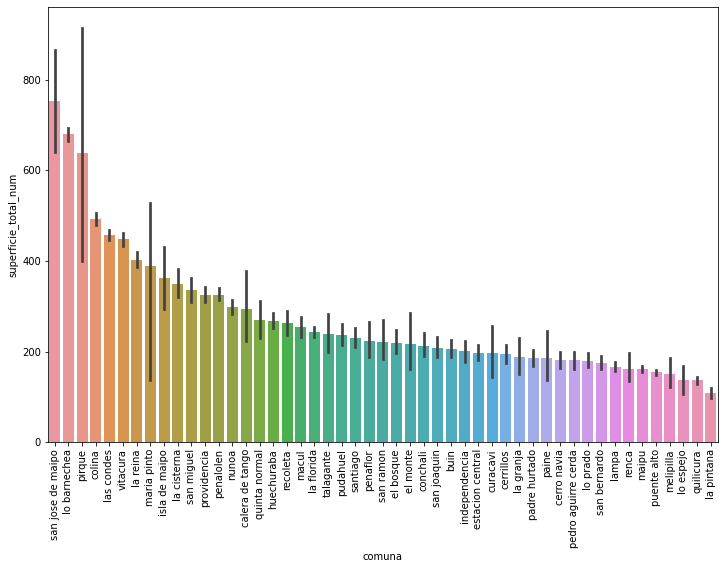

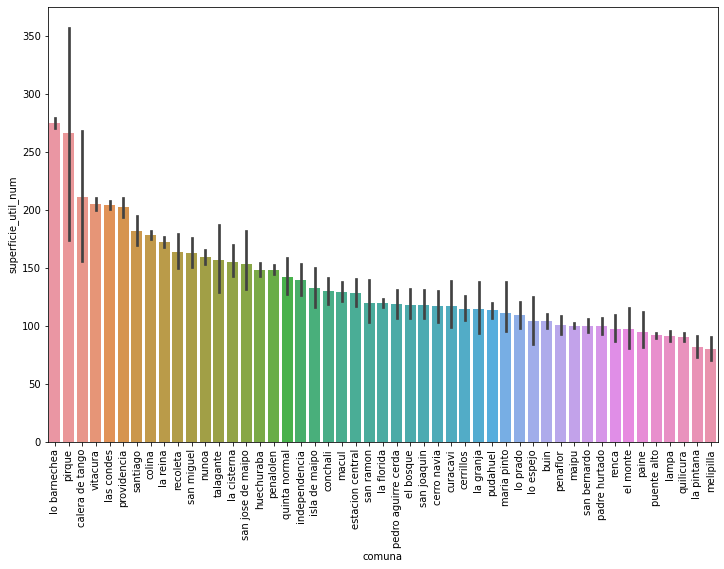

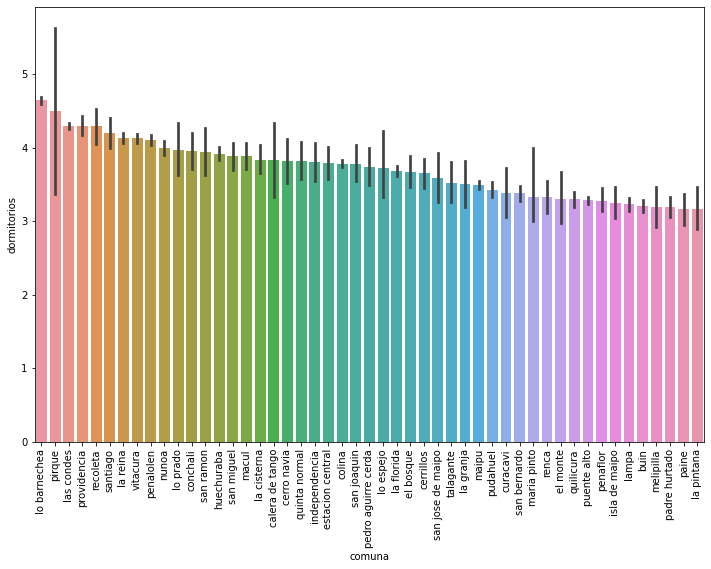

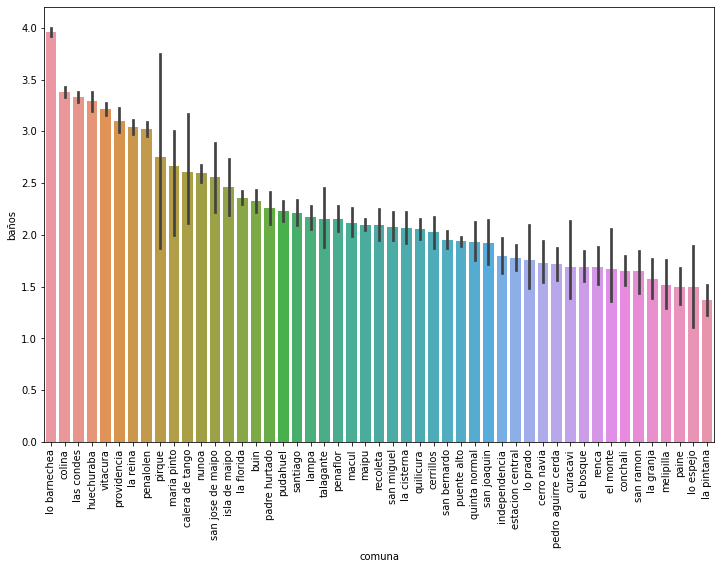

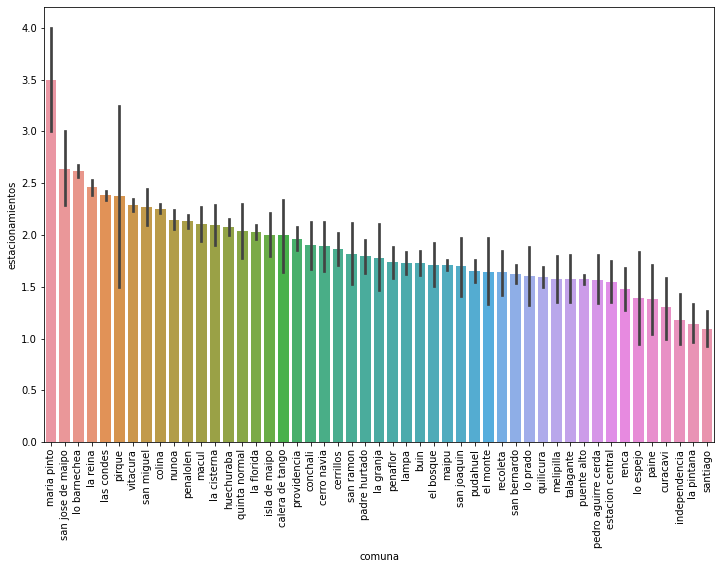

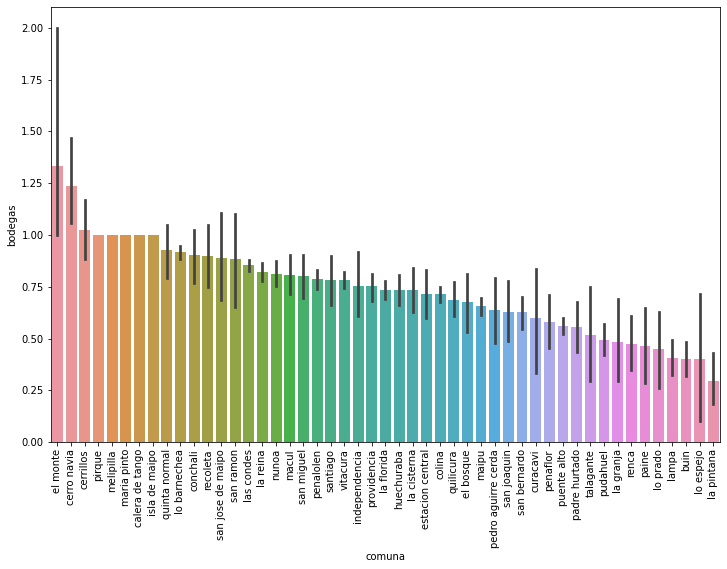

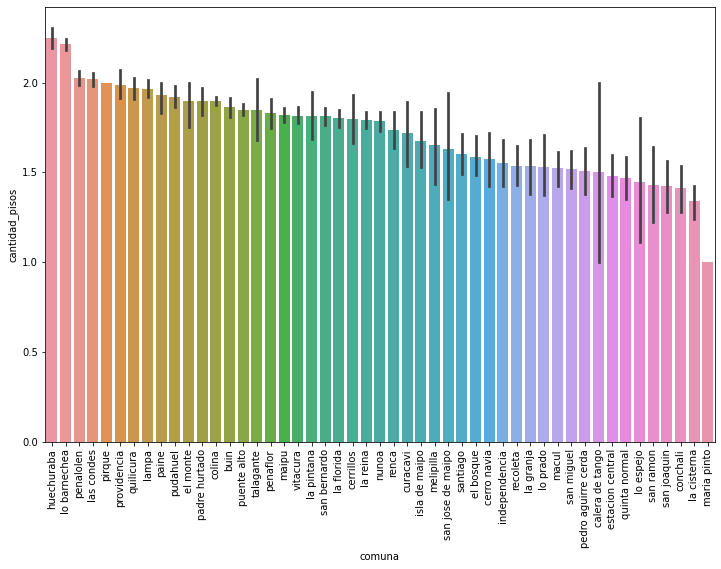

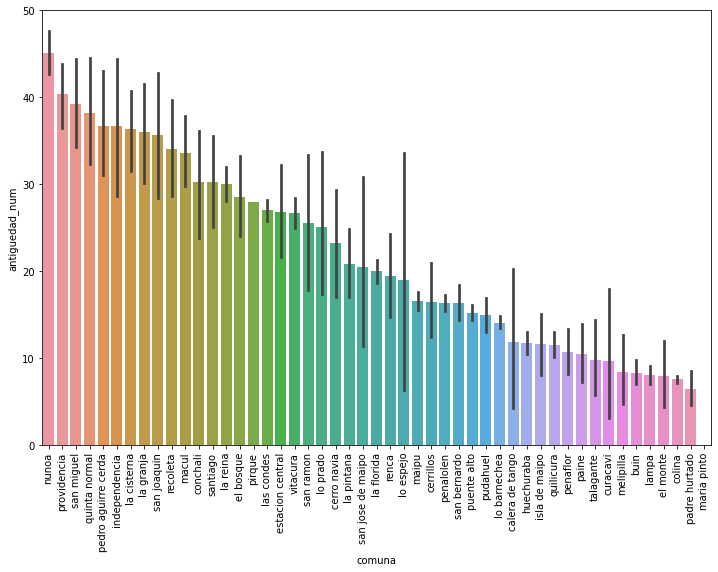

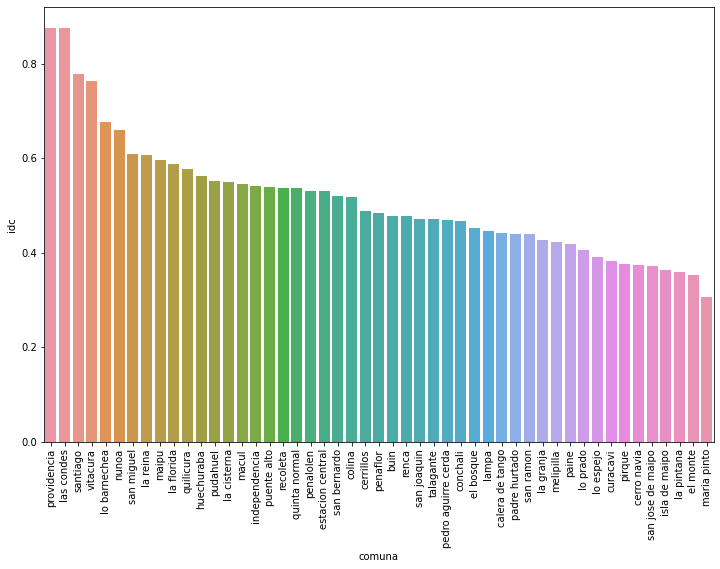

In [332]:
for var in var_numtp:
    plt.figure(figsize=(12, 8))
    ordered_data = train.groupby('comuna')[var].mean().sort_values(ascending=False).index
    sns.barplot(x='comuna', y=var, data=train, order=ordered_data)
    plt.xticks(rotation=90)
    plt.show()

# Preparación de datos

## Imputación de datos nulos

En general, casi todas las variables numéricas y binarias presentan valores nulos a ser imputados.

Se imputarán las variables mediante el método *IterativeImputer* con el estimador por default *BayesianRidge*.

In [333]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer  

# Se definen las variables numéricas a usar para la imputación
var_numtpiz_bin = [var for var in (var_numtp + var_numiz + var_bin)]

# Definición del imputer
imputer = IterativeImputer()

# Se ajusta el imputer a los datos de entrenamiento y se transforman
imp_train_X = imputer.fit_transform(train_X[var_numtpiz_bin])
imp_train_X

array([[ 1.10000000e+02,  9.43016964e+01,  3.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.80000000e+02,  1.01000000e+02,  3.00000000e+00, ...,
         4.39751916e-02,  3.66677069e-02,  2.70391728e-02],
       [ 6.60000000e+02,  1.12000000e+02,  3.00000000e+00, ...,
         3.50401483e-02,  2.57339806e-02,  1.25406802e-02],
       ...,
       [ 4.27000000e+02,  1.80000000e+02,  4.00000000e+00, ...,
         1.12177638e-02,  4.56507351e-03,  1.00262894e-02],
       [ 4.50000000e+02,  1.40000000e+02,  4.00000000e+00, ...,
         1.21875347e-02,  2.24123980e-02, -1.85251248e-02],
       [ 7.00000000e+02,  3.04000000e+02,  5.00000000e+00, ...,
         2.62085045e-02,  5.00831713e-02,  5.17920113e-03]])

El resultado se vuelve a convertir en un objeto dataframe y se concatena con las variables categóricas.

In [334]:
imp_train_X = pd.DataFrame(imp_train_X, columns = var_numtpiz_bin, index=train_X.index)
imp_train_X = pd.concat([imp_train_X, train_X[var_cats]], axis=1)
imp_train_X

,superficie_total_num,superficie_util_num,dormitorios,baños,estacionamientos,bodegas,cantidad_pisos,antiguedad_num,idc,estaciones_metro,...,ascensor,c_basquetbol,c_futbol,c_paddle,c_tenis,c_polideportiva,salon_fiestas,amoblado,comuna,barrio
15042,110.0,94.301696,3.000000,2.000000,2.000000,0.500620,2.000000,0.000000,0.5767,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,quilicura,norte de quilicura
9189,180.0,101.000000,3.000000,2.000000,3.000000,0.683306,1.000000,33.000000,0.5970,0.0,...,0.012153,0.032885,0.048888,0.019381,0.032002,0.043975,0.036668,0.027039,maipu,nueva san martin
16984,660.0,112.000000,3.000000,1.000000,2.000000,0.699151,1.026451,46.639788,0.6081,5.0,...,0.012701,0.021896,0.033610,0.024254,0.026898,0.035040,0.025734,0.012541,san miguel,el llano
12518,250.0,200.000000,5.000000,3.000000,1.000000,1.000000,2.000000,0.000000,0.8756,5.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,providencia,salvador
13884,120.0,82.000000,3.000000,3.000000,1.000000,1.000000,2.000000,9.000000,0.5388,0.0,...,0.478346,0.809911,0.928980,0.504107,0.717961,1.000000,0.918817,0.450129,puente alto,plaza viva
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2568,394.0,500.000000,5.788281,3.285098,3.003885,1.184065,1.000000,77.000000,0.5505,2.0,...,0.070319,0.084004,0.106625,0.058677,0.072183,0.092106,0.149674,0.038943,la cisterna,lo ovalle
15208,96.0,90.000000,3.000000,2.000000,2.150565,0.406554,2.000000,15.000000,0.5767,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,quilicura,norte de quilicura
19193,427.0,180.000000,4.000000,3.000000,2.000000,1.000000,2.000000,7.000000,0.5182,0.0,...,0.001579,0.009947,0.022052,0.002896,0.008564,0.011218,0.004565,0.010026,colina,chicureo
2033,450.0,140.000000,4.000000,4.000000,2.000000,0.000000,2.000000,6.598827,0.5630,0.0,...,-0.001753,0.007977,0.018840,0.009746,-0.002448,0.012188,0.022412,-0.018525,huechuraba,pedro fontova


Luego las variables del dataframe a excepción de idc se redondean al entero mas cercano debido a la naturaleza de las estas.

In [335]:
var_numtp_bin = var_numtp + var_bin
for var in var_numtp_bin:
    if var != 'idc':
        imp_train_X[var] = imp_train_X[var].apply(lambda x: round(x))

In [336]:
imp_train_X

,superficie_total_num,superficie_util_num,dormitorios,baños,estacionamientos,bodegas,cantidad_pisos,antiguedad_num,idc,estaciones_metro,...,ascensor,c_basquetbol,c_futbol,c_paddle,c_tenis,c_polideportiva,salon_fiestas,amoblado,comuna,barrio
15042,110,94,3,2,2,1,2,0,0.5767,0.0,...,0,0,0,0,0,0,0,0,quilicura,norte de quilicura
9189,180,101,3,2,3,1,1,33,0.5970,0.0,...,0,0,0,0,0,0,0,0,maipu,nueva san martin
16984,660,112,3,1,2,1,1,47,0.6081,5.0,...,0,0,0,0,0,0,0,0,san miguel,el llano
12518,250,200,5,3,1,1,2,0,0.8756,5.0,...,0,0,0,0,0,0,0,0,providencia,salvador
13884,120,82,3,3,1,1,2,9,0.5388,0.0,...,0,1,1,1,1,1,1,0,puente alto,plaza viva
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2568,394,500,6,3,3,1,1,77,0.5505,2.0,...,0,0,0,0,0,0,0,0,la cisterna,lo ovalle
15208,96,90,3,2,2,0,2,15,0.5767,0.0,...,0,0,0,0,0,0,1,0,quilicura,norte de quilicura
19193,427,180,4,3,2,1,2,7,0.5182,0.0,...,0,0,0,0,0,0,0,0,colina,chicureo
2033,450,140,4,4,2,0,2,7,0.5630,0.0,...,0,0,0,0,0,0,0,0,huechuraba,pedro fontova


In [337]:
nulos_por_columna = imp_train_X.isnull().sum().sort_values(ascending=False)
nulos_por_columna = nulos_por_columna[nulos_por_columna > 0]
print(nulos_por_columna)

Series([], dtype: int64)


## Selección de variables 

### Variables numéricas 

Se utiliza el criterio del estadístico F para evaluar la capacidad explicativa que posee cada una de las variables numéricas sobre la variable objetivo.

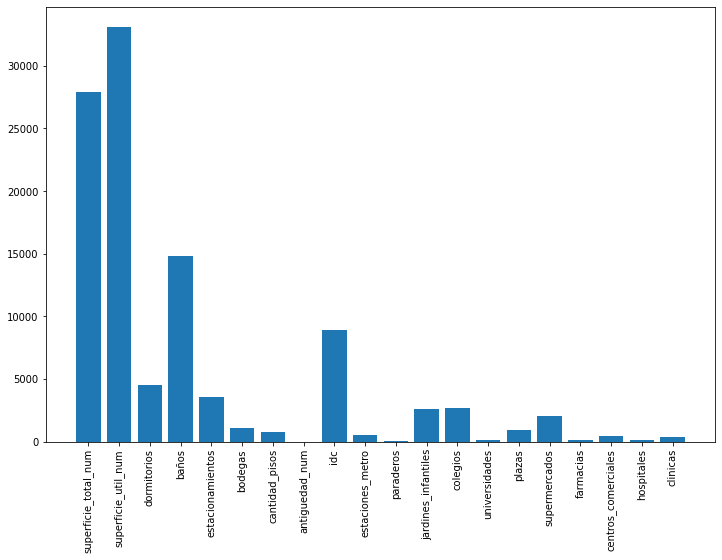

In [338]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# Definición de variables numéricas
var_numtpiz = var_numtp + var_numiz

# Definición del método a utilizar
sv_num = SelectKBest(score_func = f_regression, k='all')

#Ajustar y transformar las variables de entrenamiento
sv_num.fit_transform(imp_train_X[var_numtpiz], train_y)

#Lista de scores
#for i, var in zip((range(len(sv_num.scores_))), var_numtpiz):
#    print(var, sv_num.scores_[i])

#print(sv_num.pvalues_)

#Graficar scores
plt.figure(figsize = (12,8))
plt.bar([score for score in var_numtpiz], sv_num.scores_)
plt.xticks(rotation=90)
plt.show()

En este caso las variables mas importantes son superficie_util_num, superficie_total_num, baños, idc, dormitorios y estacionamientos, por otro lado, también se pueden destacar las variables colegios, jardines_infantiles, supermercados, idc y plazas en menor medida. Todas estas variables mencionadas coinciden  con la importancia vista mediante el coeficiente de Pearson y Spearman. En base a estos resultados, las variables numéricas seleccionadas para alimentar los modelos candidatos serán las que fueron mencionadas.

### Variables categóricas 

Para la selección de las variables categóricas se usará el criterio ANOVA (F-test) mediante el método *SelectKBest*, en donde se define el ANOVA como *f_classif* en el argumento *score_func*.

Primero, para utilizar el método las variables categóricas serán codificadas mediante el método *cat.codes*.

In [339]:
imp_train_X_cat = imp_train_X[var_cats].astype('category').apply(lambda x: x.cat.codes)

comuna 1.4369729
barrio 1.2890183


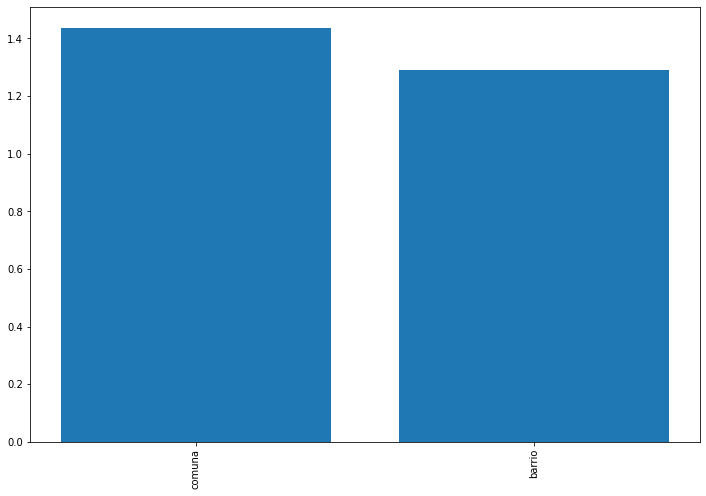

In [340]:
from sklearn.feature_selection import f_classif

# Definiendo el método a utilizar
sv_cat = SelectKBest(score_func = f_classif, k='all')

# Ajustar y transformar las variables de entrenamiento
sv_cat.fit_transform(imp_train_X_cat, train_y)

# Lista de scores
indices = sv_cat.get_support(indices=True)
for i, var in zip((range(len(sv_cat.scores_))), var_cats):
    print(var, sv_cat.scores_[i])

#print(sv_cat.pvalues_)
    
# Graficar scores
plt.figure(figsize = (12,8))
plt.bar([score for score in var_cats], sv_cat.scores_)
plt.xticks(rotation=90)
plt.show()

Para este caso, el método otorga un puntaje similar a las variables categóricas, por lo que serán usadas ambas al momento de evaluar los modelos candidatos.

### Variables binarias

Para la selección de variables binarias se utilizará el coeficiente de correlación biserial, el cual indica la relación entre una variable binaria y una variable numérica.

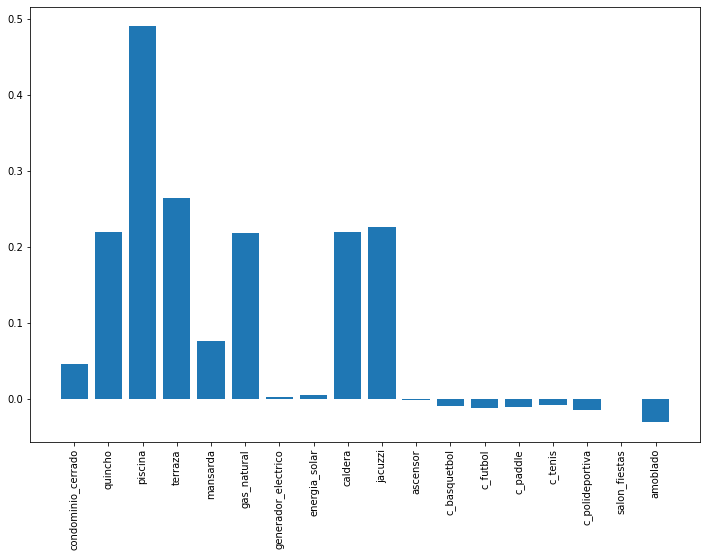

In [341]:
from scipy.stats import pointbiserialr

correlaciones = {}
for var in var_bin:  
    correlacion, valor_p = pointbiserialr(imp_train_X[var], train_y)
    correlaciones[var] = correlacion
              
#Graficar scores
plt.figure(figsize = (12,8))
plt.bar([var for var in var_bin], [correlacion for correlacion in correlaciones.values()] )
plt.xticks(rotation=90)
plt.show()

Para este caso, las variables con el mayor coeficiente de correlación biserial con respecto a la variable objetivo son piscina, jacuzzi, terraza, caldera, quincho y gas_natural. Las cuales presentan un coeficiente relativamente alto en comparación a las demás, aunque se debe tener presente que la correlación es de nivel medio con respecto a la variable piscina y medio bajo para el resto de variables mencionadas (cercano a 0.2). A pesar de ello, se van a tomar en cuenta todas las variables anteriormente mencionadas, ya que además coinciden con el análisis bivariado realizado anteriormente.

## Escalamiento de datos

Debido a la cantidad de outliers existentes en las variables numéricas y la diferencia en la unidad de medida de estas, es necesario escalar los datos. Para ello se utilizará el método de estandarización robusta, el cual corresponde al valor de la variable menos la mediana, dividido por la diferencia entre los percentiles 75 y 25.

Además las variables categóricas serán codificadas usando el método *OneHotEncoder*.

In [342]:
from sklearn.preprocessing import RobustScaler

# Se definen las variables seleccionadas
var_nums = ['superficie_util_num', 'baños', 'estacionamientos', 'dormitorios', 'superficie_total_num', 
           'jardines_infantiles', 'colegios', 'supermercados', 'plazas']

var_bins = ['piscina', 'jacuzzi', 'terraza', 'caldera', 'quincho', 'gas_natural'] 

var_nums_bins = var_nums + var_bins

#Se define el método para escalar las variables numéricas
scaler = RobustScaler()

#Se ajusta le método
scaler.fit(imp_train_X[var_nums_bins])

#Se escalan las variables numéricas
sca_imp_train_X_num = scaler.transform(imp_train_X[var_nums_bins])

Se define una función para imputar y transformar las variables

In [352]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

def transformer_var(train_X, test_X, var_num, var_bin, var_cats):
    
    # Se define el imputer
    imputer = IterativeImputer()
    
    # Se define una nueva variable
    var_num_bin = var_num + var_bin
    
    # Se ajusta el imputer y se transforman los datos
    imp_train_X = imputer.fit_transform(train_X[var_num_bin])
    
    # Se transforman los datos de prueba
    imp_test_X = imputer.transform(test_X[var_num_bin])
    
    # Se transforma a data frame para poder aplicar el método columntransform
    imp_train_X = pd.DataFrame(imp_train_X, columns = var_num_bin, index=train_X.index)
    imp_test_X = pd.DataFrame(imp_test_X, columns = var_num_bin, index=test_X.index)
    
    # Se redondean los resultados obtenidos menos la variable idc
    for var in var_num:
        if var != 'idc':
            imp_train_X[var] = imp_train_X[var].apply(lambda x: round(x))
            imp_test_X[var] = imp_test_X[var].apply(lambda x: round(x))
    
    # Se define el robust scaler
    scaler = RobustScaler()
    
    if len(var_cats) > 0:
        imp_train_X = pd.concat([imp_train_X, train_X[var_cats]], axis=1)
        imp_test_X = pd.concat([imp_test_X, test_X[var_cats]], axis=1)
    
        # Se define el one hot encoder
        ohe = OneHotEncoder(sparse = False, handle_unknown = 'ignore')
    
        # Se define el transformer
        transformer = ColumnTransformer([('num', scaler, var_num),
                                         ('cat', ohe, var_cats)], remainder = 'passthrough') 
    
    elif len(var_cats) == 0:
        transformer = ColumnTransformer([('num', scaler, var_num)], remainder = 'passthrough') 
    
    # Se ajusta el transformer y se transforman los datos ya imputados
    trans_train_X = transformer.fit_transform(imp_train_X)
    
    # Se transforman los datos de prueba
    trans_test_X = transformer.transform(imp_test_X)
    
    nombres_columnas = transformer.named_transformers_['num'].get_feature_names_out(var_num).tolist()
    if len(var_cats) > 0:
        nombres_columnas += transformer.named_transformers_['cat'].get_feature_names_out(var_cats).tolist()
    nombres_columnas += var_bin
    
    return trans_train_X, trans_test_X, nombres_columnas

In [421]:
# Se definen las variables seleccionadas
var_nums = ['superficie_util_num', 'superficie_total_num', 'baños', 'estacionamientos', 'dormitorios',  
           'colegios', 'jardines_infantiles', 'supermercados', 'plazas', 'idc']

var_bins = ['piscina', 'jacuzzi', 'terraza', 'caldera', 'quincho', 'gas_natural'] 

var_cats = ['comuna', 'barrio']
trans_train_X, trans_test_X, nombres_columnas = transformer_var(train_X, test_X, var_nums, var_bins, var_cats)
print((trans_train_X.shape), (trans_test_X.shape))

(17717, 380) (4430, 380)


# Entrenamiento y selección del modelo

A continuación se comparan distintos modelos mediante el método cross_val_score, el cual estimará un promedio del accuracy utilizando la validación cruzada solo para los datos de entrenamiento.

## Validación de modelos

Se utiliza la función cross_val_score para evaluar los modelos mediante la validación cruzada según el accuracy que obtenga cada uno.

En el proceso de validación los datos son divididos en 5 secciones, en donde 4 son usadas para entrenar el modelo y 1 para validarlo, este proceso se repite 5 veces hasta que todas las secciones de datos hayan sido consideradas para validar el modelo, además este proceso es repetido 3 veces, por lo que cada modelo sera entrenado un total de 15 veces.

In [422]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

# Se define la función para validar cada modelo
def validar_modelo(modelo, X, y):
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
    scores = cross_val_score(modelo, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
    return scores

## Definición de modelos

Los modelos a evaluar son 6 y son mecionados a continuación:

- Decision Tree Regressor
- Random Forest Regressor
- XGBOOST Regresor
- K-Nearest Neighbors regressor
- Ridge regression
- Lasso regression

Los modelos seran definidos con hyper-parámetros por default.

In [423]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor

rf = RandomForestRegressor(n_jobs=-1, random_state=10)

xgb = XGBRegressor(random_state=10)

gbr = GradientBoostingRegressor(random_state=10)

knn = KNeighborsRegressor(n_jobs=-1)

rr = Ridge()

lr = Lasso()

In [424]:
def ev_cvs(X,y):
    nombres = []
    rmse = []
    dict_rmse = {}
    
    modelos = {'Random Forest': rf, 'XGBOOST': xgb, 'Gradient boosting regressor': gbr, 
               'K-Nearest Neighbors': knn, 'Ridge Regression': rr, 'Lasso regression': lr}

    for nombre, modelo in modelos.items():
        scores = validar_modelo(modelo, X, y)
        rmse.append(np.sqrt(-scores))
        nombres.append(nombre)
        dict_rmse[nombre] = np.mean(np.sqrt(-scores))
        print('El modelo', nombre, 'tiene un RMSE de %.3f (%.3f)' % (np.mean(np.sqrt(-scores)), np.std(np.sqrt(-scores))))
                                    
    return dict_rmse, rmse, nombres

In [425]:
# Evaluación preliminar de los 6 modelos con todas las variables
rmse_tv, rmse_tv_list, nombres_tv = ev_cvs(trans_train_X, train_y)

El modelo Random Forest tiene un RMSE de 89778968.454 (2734423.325)
El modelo XGBOOST tiene un RMSE de 92357510.952 (2213296.856)
El modelo Gradient boosting regressor tiene un RMSE de 100254833.119 (2283776.051)
El modelo K-Nearest Neighbors tiene un RMSE de 103782641.021 (2107025.246)
El modelo Ridge Regression tiene un RMSE de 104317823.416 (1926396.028)
El modelo Lasso regression tiene un RMSE de 104473957.769 (1966396.742)


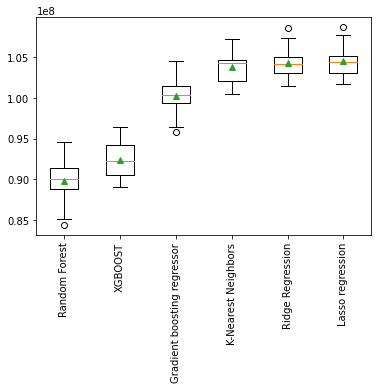

In [426]:
plt.boxplot(rmse_tv_list, labels = nombres_tv, showmeans=True)
plt.xticks(rotation=90)
plt.show()

De los 6 modelos candidatos, ninguno presenta un RMSE aceptable, de hecho el valor de esta métrica es bastante elevado. El modelo que posee el mejor rendimiento corresponde al modelo Random Forest seguido muy de cerca por el modelo XGBoost. Posiblemente ambos modelos y todos los demás estén sobreajustados a los datos de entrenamiento, por esta razón se realizará una optimización de los hiperparámetros a los cuatro mejores modelos para ver si es posible obtener alguna mejoría. 

## Optimización y evaluación de modelos

Para la optimización de los modelos se usará el método HalvingRandomSearchCV, el cual consiste principalmente en una busqueda aleatoria para encontrar la combinación óptima, aplicando un enfoque de reducción de la muestra. De esta manera se reduce considerablemente el tiempo de calculo.

In [427]:
from sklearn.metrics import mean_squared_error
def rmse_f(y, pred_y):
    mse = mean_squared_error(y, pred_y)
    rmse = np.sqrt(mse)
    return rmse

### Random Forest

Antes de realizar cualquier optimización, primero se calcula el RMSE para los datos de entrenamiento con el propósito de comparar los resultados obtenidos del método *cross_val_score*.

In [428]:
def overfitting(X_train, y_train, model):
    # Se ajusta el modelo
    model.fit(X_train, y_train)

    # Se pronóstican los y en base al conjunto de prueba
    pred_train_y = model.predict(X_train)

    # Se evalúa el modelo
    rmse_train = rmse_f(y_train, pred_train_y)
    
    # Se calcula el R2
    r2 = model.score(X_train, y_train)
    return rmse_train

In [429]:
rf_rmse_train = overfitting(trans_train_X, train_y, rf)
rf_rmse_train

33247848.61779139

Comparando este resultado con el RMSE del método *cross_val_score* claramente se puede concluir que existe un sobreajuste bastante alto, por lo que la optimización es necesaria.

#### Optimización

In [430]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

def best_rf_op(X_train,y_train):
    # Hiper-parámetros Random Forest
    param_rf = [{'n_estimators': [100, 200, 300, 400], 
                  'max_features': ['auto', 'sqrt', 'log2'], 
                  'max_depth': [10, 20, 30],
                  'min_samples_split': [2, 5, 10, 20],
                  'min_samples_leaf': [1, 2, 5, 10, 20]}]

    # Aplicación del método GridSearchCV
    random_search_rf = HalvingRandomSearchCV(rf, param_rf, n_jobs =-1, cv=5, factor=4,
                                          scoring='neg_mean_squared_error', random_state=1)
    random_search_rf.fit(X_train, y_train)
    rmse = np.sqrt(-random_search_rf.best_score_)
    best_param = random_search_rf.best_params_
    print(f" Optimizando hiper-parámetros se obtiene un RMSE: {rmse} usando {best_param}")

    # Guardando el modelo con los mejores hyper-parámetros
    best_rf = random_search_rf.best_estimator_
    
    return best_rf, best_param

In [431]:
best_rf, best_param_rf = best_rf_op(trans_train_X, train_y)

 Optimizando hiper-parámetros se obtiene un RMSE: 101363213.49149105 usando {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 20}


#### Evaluación 

Al evaluar el modelo en los datos de prueba se obtiene un mejor resultado, pero aun así este resultado es bastante malo.

In [432]:
def ev_op(X_test, y_test, best_model):  
    # Se pronóstican los y en base al conjunto de prueba
    pred_y = best_model.predict(X_test)

    # Se evalúa el modelo
    rmse = rmse_f(y_test, pred_y)
    return rmse

In [433]:
rf_rmse = ev_op(trans_test_X, test_y, best_rf)
rf_rmse

81475451.39990194

Por otra parte, se tiene un coeficiente de determinación de aproximadamente 0.94, lo que es bastante bueno, ya que el modelo explica un 94% de la variabilidad en la variable objetivo.

In [434]:
rf_r2 = best_rf.score(trans_test_X, test_y)
rf_r2

0.9385268356297871

In [435]:
sorted(zip(best_rf.feature_importances_*100, nombres_columnas), reverse = True)

[(45.544190127480256, 'superficie_util_num'),
 (27.285723731582877, 'idc'),
 (16.41125072639779, 'superficie_total_num'),
 (1.5979322344598126, 'baños'),
 (1.1757465054070075, 'comuna_santiago'),
 (0.5592809565745183, 'caldera'),
 (0.4922422998864454, 'comuna_vitacura'),
 (0.42643938147048, 'piscina'),
 (0.40320213233887847, 'jacuzzi'),
 (0.37864910144216346, 'dormitorios'),
 (0.35937225662239847, 'plazas'),
 (0.35770310074189676, 'jardines_infantiles'),
 (0.34639223319709717, 'colegios'),
 (0.32624674912181445, 'supermercados'),
 (0.3153913013699514, 'estacionamientos'),
 (0.30026691328952965, 'gas_natural'),
 (0.25271592811610943, 'quincho'),
 (0.21011303308370427, 'barrio_barrio el golf'),
 (0.2026517479535288, 'terraza'),
 (0.1646969544611216, 'comuna_penalolen'),
 (0.14721430839688007, 'comuna_la reina'),
 (0.1307661103165863, 'comuna_colina'),
 (0.129055850465873, 'barrio_jardin del este'),
 (0.11494141751095675, 'comuna_san miguel'),
 (0.10060143681102668, 'barrio_parque bicente

### XGBoost

Se aplica el mismo procedimiento para este modelo.

In [436]:
xgb_rmse_train = overfitting(trans_train_X, train_y, xgb)
xgb_rmse_train

66412675.68514289

Para este modelo también se concluye que existe un sobreajuste pero a un nivel medio en los datos de entrenamiento, por lo que la optimización es sumamente importante.

#### Optimización 

In [437]:
def best_xgb_op(X_train,y_train):
    # Definición de parámetros
    params = [{'colsample_bytree': [0.5, 0.7, 1], # default 1
               'learning_rate': [0.1, 0.3, 0.5], # default 0.1
               'max_depth': [3, 6, 9], # default 3
               'n_estimators': [100, 250, 400], # default 100
               'subsample': [0.5, 0.7, 1],
               'reg_lambda': [1, 5, 10]}] # default 1

    #Aplicación del método RandomizedSearchCV
    random_search_xgb = HalvingRandomSearchCV(xgb, params, n_jobs = -1, cv = 5, factor=4, 
                                           scoring = 'neg_mean_squared_error', random_state=1)
    random_search_xgb.fit(X_train, y_train)
    rmse = np.sqrt(-random_search_xgb.best_score_)
    best_param = random_search_xgb.best_params_
    print(f" Optimizando hiper-parámetros se obtiene un RMSE: {rmse} usando {best_param}")

    # Guardando el modelo con los mejores hyper-parámetros
    best_xgb = random_search_xgb.best_estimator_
    return best_xgb, best_param

In [438]:
best_xgb, best_param_xgb = best_xgb_op(trans_train_X, train_y)

 Optimizando hiper-parámetros se obtiene un RMSE: 98996520.35986641 usando {'subsample': 0.7, 'reg_lambda': 5, 'n_estimators': 400, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.5}


#### Evaluación 

Al evaluar el modelo en los datos de prueba se obtiene un mejor resultado, pero aun así el resultado sigue siendo bastante malo.

In [440]:
xgb_rmse = ev_op(trans_test_X, test_y, best_xgb)
xgb_rmse

87361956.45128462

Por otra parte, se tiene un coeficiente de determinación de aproximadamente 0.93, lo que es bastante bueno, ya que el modelo explica un 93% de la variabilidad en la variable objetivo.

In [455]:
xgb_r2 = best_xgb.score(trans_test_X, test_y)
xgb_r2

0.9293232254536277

### Gradient Boosting Regressor

El sobreajuste asociado a este modelo es bastante bajo, por lo que la optimización no es tan necesaria, aunque en vista de los malos resultados obtenidos se decide igualmente optimizar los hiperparámetros.

In [441]:
gbr_rmse_train = overfitting(trans_train_X, train_y, gbr)
gbr_rmse_train

95125338.73995115

#### Optimización

In [442]:
def best_gbr_op(X_train,y_train):
    params = [{'learning_rate': [0.01, 0.1, 0.3, 0.5], # default 0.1
               'max_depth': [3, 6, 9], # default 3
               'n_estimators': [100, 250, 400], 
               'subsample': [0.5, 0.7, 1]}]

    #Aplicación del método RandomizedSearchCV
    random_search_gbr = HalvingRandomSearchCV(gbr, params, n_jobs = -1, cv = 5, factor=4, 
                                           scoring = 'neg_mean_squared_error', random_state=1)
    random_search_gbr.fit(X_train, y_train)
    rmse = np.sqrt(-random_search_gbr.best_score_)
    best_param = random_search_gbr.best_params_
    print(f" Optimizando hiper-parámetros se obtiene un RMSE: {rmse} usando {best_param}")

    # Guardando el modelo con los mejores hyper-parámetros
    best_gbr = random_search_gbr.best_estimator_
    
    return best_gbr, best_param

In [443]:
best_gbr, best_param_gbr = best_gbr_op(trans_train_X, train_y)

 Optimizando hiper-parámetros se obtiene un RMSE: 109279406.34537464 usando {'subsample': 0.5, 'n_estimators': 400, 'max_depth': 6, 'learning_rate': 0.01}


#### Evaluación

Al igual que en los casos anteriores, el modelo no entrega buenos resultados en el conjunto de prueba.

In [445]:
gbr_rmse = ev_op(trans_test_X, test_y, best_gbr)
gbr_rmse

87729410.97927026

Por otra parte, se tiene un coeficiente de determinación de aproximadamente 0.93, lo que es bastante bueno, ya que el modelo explica un 93% de la variabilidad en la variable objetivo.

In [456]:
gbr_r2 = best_gbr.score(trans_test_X, test_y)
gbr_r2

0.9287274256488167

### K-Nearest Neighbors

El sobreajuste asociado a este modelo se considera bajo, por lo que la optimización no es necesaria, aunque en vista de los malos resultados obtenidos se decide optimizar los hiperparámetros.

In [446]:
knn_rmse_train = overfitting(trans_train_X, train_y, knn)
knn_rmse_train

82850981.69857295

#### Optimización 

A diferencia de las otras 3 optimizaciones, en este modelo es necesario usar el método GridSearchCV.

In [447]:
from sklearn.model_selection import GridSearchCV
def best_knn_op(X_train, y_train):
    params = [{'n_neighbors': [5,6,7,8,9,10,11,12,13,14,15]}]

    # Aplicación del método RandomizedSearchCV
    random_search_knn = GridSearchCV(knn, params, n_jobs = -1, cv = 5, 
                                           scoring = 'neg_mean_squared_error')
    random_search_knn.fit(X_train, y_train)
    rmse = np.sqrt(-random_search_knn.best_score_)
    best_param = random_search_knn.best_params_
    print(f" Optimizando hiper-parámetros se obtiene un RMSE: {rmse} usando {random_search_knn.best_params_}")

    # Guardando el modelo con los mejores hyper-parámetros
    best_knn = random_search_knn.best_estimator_
    
    return best_knn, best_param

In [448]:
best_knn, best_param_knn = best_knn_op(trans_train_X, train_y)

 Optimizando hiper-parámetros se obtiene un RMSE: 103275188.77722481 usando {'n_neighbors': 8}


#### Evaluación

Al igual que en los casos anteriores, el modelo no entrega buenos resultados en el conjunto de prueba. De hecho, este modelo entrega el peor RMSE.

In [450]:
knn_rmse = ev_op(trans_test_X, test_y, best_knn)
knn_rmse

96420876.47203217

También entrega el peor coeficiente de determinación, el cual es 0.91, aunque este valor indica que el modelo es bueno.

In [457]:
knn_r2 = best_knn.score(trans_test_X, test_y)
knn_r2

0.9139057457348594

Debido a que el error permanece alto a pesar de optimizar los hiper-parámetros de los modelos mas prometedores, se opta por aplicar métodos de ensemble learning, en particular se aplicará el método de stacking.

### Método Stacking 

Debido a que los 4 modelos anteriores no determinan buenas predicciones, generando un RMSE bastante alto, se procede a utilizar el método stacking, el cual ocupará los 4 modelos anteriores y un meta modelo, el cual será una regresión lineal que tendrá como inputs a las predicciones realizadas por estos modelos.

El modelo funciona de la siguiente manera:

1. Se dividen los datos en función de la validación cruzada, en este caso en cv = 5 partes iguales, donde una parte se ocupa como data de validación y el resto como entrenamiento, esto se repite hasta que cada una de las partes haya sido ocupada como validación.

2. Cada modelo es entrenado 5 veces y cada uno de estos calcula la predicción en base a la parte de validación.

3. Una vez se determinan todas las predicciones, se tiene un nuedo conjunto de datos con la misma cantidad de filas que la data de entrenamiento completa pero con una columna por cada modelo.

4. Este conjunto de datos se utiliza para entrenar el meta modelo.

5. Luego se entrenan los 4 modelos en el conjunto de datos de entrenamiento completo (sin realizar cv), con el fin de poder predecir nuevos datos y así generar las entradas para el meta modelo, el cual calculará la predicción final.

#### Método Stacking sin modelos con hiperparámetros optimizados 

Se determina el rendimiento del método stacking pero con los modelos sin sus hiperparámetros optimizados.

In [451]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression

# Se definen los modelos a utilizar
modelos = [
    ('rf', rf),
    ('xgb', xgb),
    ('gbr', gbr),
    ('knn', knn)
]

stacking_rgr = StackingRegressor(modelos, final_estimator=LinearRegression(), cv=5, n_jobs=-1)
stacking_rgr.fit(trans_train_X, train_y)

stacking_rgr.score(trans_test_X, test_y) 

0.9410131359301959

El método stacking regressor entrega mejores resultados en general, tanto en RMSE y coeficiente de determinación, pero estos resultados obtenidos no son buenos. Por lo mismo se probará el método stacking con los modelos optimizados

In [452]:
stacking_rmse = ev_op(trans_test_X, test_y, stacking_rgr)
stacking_rmse

79810796.45553213

#### Método Stacking con modelos con hiperparámetros optimizados 

Se determina el rendimiento del método stacking pero con los modelos con sus hiperparámetros optimizados.

In [453]:
# Se definen los modelos con hiperparámetros optimizados
rf_op = RandomForestRegressor(**best_param_rf, n_jobs=-1, random_state=10)
xgb_op = XGBRegressor(**best_param_xgb, random_state=10)
gbr_op = GradientBoostingRegressor(**best_param_gbr, random_state=10)
knn_op = KNeighborsRegressor(**best_param_knn, n_jobs=-1)

modelos_op = [
    ('rf_op', rf_op),
    ('xgb_op', xgb_op),
    ('gbr_op', gbr_op),
    ('knn_op', knn_op)
]

stacking_rgr_op = StackingRegressor(modelos_op, final_estimator=LinearRegression(), cv=5, n_jobs=-1)
stacking_rgr_op.fit(trans_train_X, train_y)

stacking_rgr_op.score(trans_test_X, test_y)

0.9406834487174487

El rendimiento con los modelos optimizados entrega resultados minimamente diferentes, por lo que no es recomendable estimar los mejores hiperparámetros.

In [454]:
stacking_rmse_op = ev_op(trans_test_X, test_y, stacking_rgr_op)
stacking_rmse_op

80033523.45993479

Se adjuntan los resultados en dos dataframe, uno de todos los modelos probados y otro solo de los modelos optimizados más el método stacking.

In [458]:
rmse_data = {'Modelos': list(rmse_tv.keys()), 'RMSE TV': list(rmse_tv.values())}
rmse_tm = pd.DataFrame(rmse_data)
rmse_tm['RMSE TV'] = rmse_tm['RMSE TV'].apply(lambda x: round(x))
rmse_tm

,Modelos,RMSE TV
0,Random Forest,89778968
1,XGBOOST,92357511
2,Gradient boosting regressor,100254833
3,K-Nearest Neighbors,103782641
4,Ridge Regression,104317823
5,Lasso regression,104473958


Se debe tener en cuenta que los modelos sin hiperparámetros optimizados no están evaluados en el conjunto de prueba, por lo que su RMSE corresponde al promedio de resultados según la validación cruzada. En cambio, los resultados obtenidos de los modelos con hiperparámetros optimizados fueron evaluados en el conjunto de prueba.

In [459]:
nombre_modelos = ['Random Forest', 'XGBOOST', 'Gradient boosting regressor', 'K-Nearest Neighbors', 'Stacking regressor']
rmse_resultados = [rf_rmse, xgb_rmse, gbr_rmse, knn_rmse, stacking_rmse]
rmse_data_op = {'Modelos': nombre_modelos, 'RMSE TV OP': rmse_resultados}
rmse_mm = pd.DataFrame(rmse_data_op)
rmse_mm['RMSE TV OP'] = rmse_mm['RMSE TV OP'].apply(lambda x: round(x))
rmse_mm

,Modelos,RMSE TV OP
0,Random Forest,81475451
1,XGBOOST,87361956
2,Gradient boosting regressor,87729411
3,K-Nearest Neighbors,96420876
4,Stacking regressor,79810796


## Evaluación de modelos con las variables mas relevantes

En base a la importancia relativa entregada por el modelo Random Forest que presenta los mejores resultados, se decide solo considerar las variables **superficie_util_num, superficie_total_num, baños, idc y barrios**, ya que estas se consideran de mayor relevancia para los modelos.

La variable comuna no fue considerada, debido a que es representada por la variable idc.

In [461]:
var_nums = ['superficie_util_num', 'superficie_total_num', 'baños', 'idc']

var_bins = []

var_cat = ['barrio']
trans_train_X_mv, trans_test_X_mv, nombres_columnas_mv = transformer_var(train_X, test_X, var_nums, var_bins, var_cat)
print((trans_train_X_mv.shape), (trans_test_X_mv.shape))

(17717, 319) (4430, 319)


### Evaluación de modelos sin optimización de hiperparámetros 

Se determina el rendimiento de los modelos sin sus hiperparámetros optimizados.

In [462]:
# Evaluación preliminar de los 6 modelos con todas las variables
rmse_mv, rmse_mv_list, nombres_mv = ev_cvs(trans_train_X_mv, train_y)

El modelo Random Forest tiene un RMSE de 89991495.288 (2476976.209)
El modelo XGBOOST tiene un RMSE de 93394061.544 (2339290.532)
El modelo Gradient boosting regressor tiene un RMSE de 103767232.256 (2209293.555)
El modelo K-Nearest Neighbors tiene un RMSE de 99830733.642 (2840675.157)
El modelo Ridge Regression tiene un RMSE de 105576421.209 (1959789.503)
El modelo Lasso regression tiene un RMSE de 105770312.093 (2046364.124)


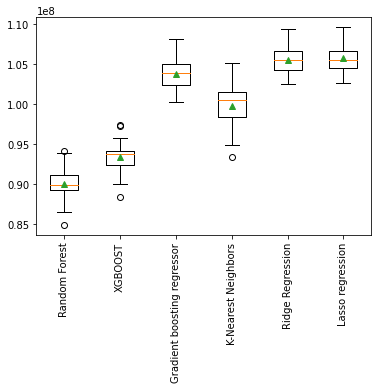

In [463]:
plt.boxplot(rmse_mv_list, labels = nombres_mv, showmeans=True)
plt.xticks(rotation=90)
plt.show()

En comparación con los modelos con todas las variables, los modelos ajustados con las variables mas relevantes presentan un rendimiento un poco menor en general, es decir, un RMSE un poco mayor, pero la diferencia es casi nula, y en el caso del modelo KNN, este presenta una leve mejoría, aunque en general los resultados siguen siendo malos.

In [464]:
rmse_tm['RMSE MV'] = list(rmse_mv.values())
rmse_tm['RMSE MV'] = rmse_tm['RMSE MV'].apply(lambda x: round(x))
rmse_tm

,Modelos,RMSE TV,RMSE MV
0,Random Forest,89778968,89991495
1,XGBOOST,92357511,93394062
2,Gradient boosting regressor,100254833,103767232
3,K-Nearest Neighbors,103782641,99830734
4,Ridge Regression,104317823,105576421
5,Lasso regression,104473958,105770312


### Evaluación de modelos con optimización de hiperparámetros 

Ahora se prueban los 4 mejores modelos más el método stacking pero con las variables mas relevantes.

In [465]:
# Random forest
best_rf_mv, best_param_rf_mv = best_rf_op(trans_train_X_mv, train_y)
rf_rmse_mv = ev_op(trans_test_X_mv, test_y, best_rf_mv)

# XGBOOST
best_xgb_mv, best_param_xgb_mv = best_xgb_op(trans_train_X_mv, train_y)
xgb_rmse_mv = ev_op(trans_test_X_mv, test_y, best_xgb_mv)

# Gradient boosting regressor
best_gbr_mv, best_param_gbr_mv = best_gbr_op(trans_train_X_mv, train_y)
gbr_rmse_mv = ev_op(trans_test_X_mv, test_y, best_gbr_mv)

# K-Nearest Neighbors
best_knn_mv, best_param_knn_mv = best_knn_op(trans_train_X_mv, train_y)
knn_rmse_mv = ev_op(trans_test_X_mv, test_y, best_knn_mv)

 Optimizando hiper-parámetros se obtiene un RMSE: 99816341.93246175 usando {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30}
 Optimizando hiper-parámetros se obtiene un RMSE: 99989528.77273406 usando {'subsample': 0.7, 'reg_lambda': 10, 'n_estimators': 100, 'max_depth': 9, 'learning_rate': 0.1, 'colsample_bytree': 0.5}
 Optimizando hiper-parámetros se obtiene un RMSE: 112400576.83420838 usando {'subsample': 0.5, 'n_estimators': 400, 'max_depth': 6, 'learning_rate': 0.01}
 Optimizando hiper-parámetros se obtiene un RMSE: 100239223.3828574 usando {'n_neighbors': 9}


### Método Stacking

#### Método Stacking sin modelos con hiperparámetros optimizados 

Se determina el rendimiento del método stacking usando las variables mas relevantes pero con los modelos sin sus hiperparámetros optimizados.

In [466]:
modelos_mv = [
    ('rf_mv', rf),
    ('xgb_mv', xgb),
    ('gbr_mv', gbr),
    ('knn_mv', knn)
]

stacking_rgr_mv = StackingRegressor(modelos_mv, final_estimator=LinearRegression(), cv=5, n_jobs=-1)
stacking_rgr_mv.fit(trans_train_X_mv, train_y)

stacking_rgr_mv.score(trans_test_X_mv, test_y)

0.9398420462817111

El método stacking entrega resultados bastante similares comparado con el uso de todas las variables.

In [467]:
stacking_rmse_mv = ev_op(trans_test_X_mv, test_y, stacking_rgr_mv)
stacking_rmse_mv

80599160.4860949

#### Método Stacking con modelos con hiperparámetros optimizados 

Se determina el rendimiento del método stacking usando las "mejores variables" con los modelos con sus hiperparámetros optimizados.

In [468]:
# Se definen los modelos optimizados
rf_mv_op = RandomForestRegressor(**best_param_rf_mv, n_jobs=-1, random_state=10)
xgb_mv_op = XGBRegressor(**best_param_xgb_mv, random_state=10)
gbr_mv_op = GradientBoostingRegressor(**best_param_gbr_mv, random_state=10)
knn_mv_op = KNeighborsRegressor(**best_param_knn_mv, n_jobs=-1)

modelos_mv_op = [
    ('rf_mv', rf_mv_op),
    ('xgb_mv', xgb_mv_op),
    ('gbr_mv', gbr_mv_op),
    ('knn_mv', knn_mv_op)
]

stacking_rgr_mv_op = StackingRegressor(modelos_mv_op, final_estimator=LinearRegression(), cv=5, n_jobs=-1)
stacking_rgr_mv_op.fit(trans_train_X_mv, train_y)

stacking_rgr_mv_op.score(trans_test_X_mv, test_y)

0.9344045550242408

Los resultados arrojan un peor resultados que los modelos sin optimización de hiperparámetros.

In [469]:
stacking_rmse_mv_op = ev_op(trans_test_X_mv, test_y, stacking_rgr_mv_op)
stacking_rmse_mv_op

84162927.19670115

Los resultados son adjuntados al dataframe correspondiente, en donde los modelos Random forest y Gradient boosting regressor empeoran su rendimiento, en cambio, los modelos XGBoost y KNN presentan una mejora. El modelo que sigue presentando los mejores resultados es el stacking regressor, aunque el RMSE haya aumentando al utilizar solo las variables mas relevantes, este aumento es insignificante considerando que al tener menos variables los modelos son entrenados más rapidamente.

In [470]:
rmse_resultados_mv = [rf_rmse_mv, xgb_rmse_mv, gbr_rmse_mv, knn_rmse_mv, stacking_rmse_mv]
rmse_mm['RMSE MV OP'] = rmse_resultados_mv
rmse_mm['RMSE MV OP'] = rmse_mm['RMSE MV OP'].apply(lambda x: round(x))
rmse_mm

,Modelos,RMSE TV OP,RMSE MV OP
0,Random Forest,81475451,90128948
1,XGBOOST,87361956,85297468
2,Gradient boosting regressor,87729411,90456659
3,K-Nearest Neighbors,96420876,92141239
4,Stacking regressor,79810796,80599160


En general, los modelos siguen presentando pésimos resultados, un RMSE del orden de 80 millones indica que el modelo tenga un error de pronóstico bastante alto, por ejemplo, una casa que vale 100 millones, en el peor de los casos, podría ser pronósticada con un valor de 20 o 180 millones. Esto indica una considerable incertidumbre en las predicciones del modelo y una falta de precisión en sus estimaciones. Por otra parte, se tiene un coeficiente de determinación superior al 0.9 en todos los modelos, lo que indica que se ajustan de buena manera a los datos.

Se experimentarán otros métodos para ver si es posible mejorar los resultados de la métrica RMSE.

### Evaluación de modelos con pesos

Para mejorar el rendimiento de los modelos, se opta por desarrollar funciones que le otorgen un peso a cada una de las instancias del conjunto de entrenamiento.

#### Pesos por outliers

Se genera una función que otorga pesos en base al precio de la casa según la distancia entre los outliers y los limites superior o inferior del rango IQR. El objetivo de esta función es darle un menor peso en función de que tan extremo sea el dato, el dato mas extremo será considerado con un peso cero, es decir, no sera considerado en el entrenamiento del modelo.

In [471]:
def sw(y): # sample weight
    # Se calcula el rango IQR
    Q1 = y.quantile(0.25)
    Q3 = y.quantile(0.75)
    IQR = Q3 - Q1
    
    # Se calculan los límites superior e inferior
    lower, upper = Q1 - IQR * 1.5, Q3 + IQR * 1.5
    
    # Indices ordenados que cumplen el criterio, se usan para asignar los pesos
    idx_outliers_ord = np.where((y > upper) | (y < lower))[0]
    
    # Indices de la data original que cumplen el criterio, se usan para calcular las distancias
    idx_outliers_ori = y.index[(y > upper) | (y < lower)]
    
    # Se calcula la distancia entre el outliers y el límite
    distancias = np.abs(y[idx_outliers_ori] - np.where(y[idx_outliers_ori] < lower, lower, upper))
    
    # Se calcula la distancia máxima
    distancia_max = np.max(distancias)
    
    # Se genera una matriz del tamaño de y solo con valores 1
    sample_weights = np.ones(len(y))
    
    # A la matriz se le asigna el peso en función de la distancia entre outliers y los límites
    sample_weights[idx_outliers_ord] = 1 - (distancias/distancia_max)
    
    return sample_weights #idx_outliers #len(outlier)#, (sorted(outlier))[0]

In [472]:
pesos = sw(train_y)

Derechamente se entrena el stacking regressor con las variables mas relevante, ya que es el modelo que ha presentado mejores resultados y el tiempo de entrenamiento es relativamente corto.

No se considera el modelo K-Nearest Neighbors, ya que no admite pesos en el ajuste.

In [473]:
modelos_sw = [
    ('rf_sw', rf),
    ('xgb_sw', xgb),
    ('gbr_sw', gbr)
]

stacking_rgr_sw = StackingRegressor(modelos_sw, final_estimator=LinearRegression(), cv=5, n_jobs=-1)
stacking_rgr_sw.fit(trans_train_X_mv, train_y, pesos)

stacking_rgr_sw.score(trans_test_X_mv, test_y)

0.9368155019958724

En este caso, al agregar pesos en base a la distancia entre los outliers y los límites del rango IQR no mejora el rendimiento del modelo.

In [474]:
stacking_rmse_sw = ev_op(trans_test_X_mv, test_y, stacking_rgr_sw)
stacking_rmse_sw

82601752.27438352

#### Pesos por cantidad de datos por comuna

Para este caso, la asignación de pesos se hace en base a la cantidad de datos por comuna, donde a cada dato de cada comuna se le asigna un peso inversamente proporcional a la cantidad de datos de la misma, es decir, se le dará mayor peso en el modelo a las comunas con menor cantidad de datos.

In [475]:
# Se crea una matriz con una cantidad de filas igual a las de train_X
pesos_pc = np.ones(train_X.shape[0])

In [476]:
# Se define un diccionario para almacenar los pesos por comuna
dict_idc = {}

for idc in train_X['idc'].unique():
    # Se determina el peso de los datos de cada comuna
    peso_idc = 1 / np.mean(train_X['idc'] == idc)
    
    # Se guardan los pesos en el diccionario
    dict_idc[idc] = {'peso_idc': peso_idc}
    
    # Se determinan los índices de cada dato correspondiente a cada comuna en base al idc
    idx_idc = np.where(train['idc'] == idc)[0]
    
    # Se almacenan los índices de los datos de cada comuna
    dict_idc[idc]['idx_idc'] = idx_idc.tolist()
    
#print(dict_idc)

In [477]:
for idc, peso_idx in dict_idc.items():
    peso_idc = peso_idx['peso_idc']
    idx_idc = peso_idx['idx_idc']
    # A la matriz de pesos, se le asignan los pesos correspondientes asociados a su idc
    pesos_pc[idx_idc] = peso_idc

In [478]:
pesos_pc

array([ 69.20703125,  14.03882726, 103.60818713, ...,  12.06058543,
        49.35097493,  10.18218391])

Al igual que para el peso basado en la distancia entre los outliers y los límites del rango IQR, se opta por utilizar el modelo Stacking regressor.

In [483]:
modelos_swc = [
    ('rf_sw', rf),
    ('xgb_sw', xgb),
    ('gbr_sw', gbr)
]

stacking_rgr_swc = StackingRegressor(modelos_swc, final_estimator=LinearRegression(), cv=5, n_jobs=-1)
stacking_rgr_swc.fit(trans_train_X_mv, train_y, pesos_pc)

stacking_rgr_swc.score(trans_test_X_mv, test_y)

0.9370294424196506

El modelo no mejora su rendimiento en comparación con los modelos que no ocupan pesos.

In [484]:
stacking_rmse_swc = ev_op(trans_test_X_mv, test_y, stacking_rgr_swc)
stacking_rmse_swc

82461790.42544368

### Evaluación de modelos sin outliers por comuna

Se decide evaluar el modelo desde otro enfoque, donde se realizará la eliminación de los outliers por comuna según el rango IQR, para ello se define la función correspondiente.

In [485]:
# Función para eliminar outliers por comuna y variable
def outliers_c(df, variables):
    comunas = []
    dict_outliers = {}
    df_outliers = pd.DataFrame()
    idx_outliers = []
    
    for comuna, df_comuna in df.groupby('comuna'):
        dict_outliers[comuna] = {}

        for var in variables:
            #dict_quantile = {}
            
            # Se determina el cuantil 25
            quantil_25 = df_comuna[var].quantile(0.25)
            #dict_quantile['q25'] = quantil_25
            
            # Se determina el cuantil 75
            quantil_75 = df_comuna[var].quantile(0.75)
            #dict_quantile['q75'] = quantil_75
            
            # Se determina el rango intercuartil
            IQR = quantil_75 - quantil_25
            
            # Se determinan los límites
            lower = quantil_25 - IQR * 1.5
            upper = quantil_75 + IQR * 1.5
            
            #dict_quantile['lower'] = lower
            #dict_quantile['upper'] = upper
            
            # Se determina la cantidad de outliers por variable y comuna
            outlier = df_comuna[(df_comuna[var] < lower) | (df_comuna[var] > upper)].index
            #print(outlier) # Entrega los outlier por columna, pero entrega todo el dataframe
            dict_outliers[comuna][var] = len(outlier)
            idx_outliers.extend(outlier) 
            #print(dict_quantile, comuna, var)
            
            if comuna not in comunas:
                comunas.append(comuna)
        #print(dict_outliers)
    
    df_outliers['comunas'] = comunas
    
    for var in variables:
        df_outliers[var] = [dict_outliers[comuna][var] for comuna in comunas]
    
        
    return df_outliers, idx_outliers

Solo se consideran los outliers de las variables de la tabla principal, la variable objetivo y la variable idc. Se utiliza el dataframe dfcc que fue copiado del dataframe dfc original antes de eliminar los outliers de manera general.

In [486]:
dfc_outliers, indices_outliers = outliers_c(dfcc, var_numtp_obj)
dfc_outliers.sum()

comunas                 buincalera de tangocerrilloscerro naviacolinac...
superficie_total_num                                                 1865
superficie_util_num                                                  1416
dormitorios                                                          1157
baños                                                                1381
estacionamientos                                                     1437
bodegas                                                              2631
cantidad_pisos                                                       3178
antiguedad_num                                                        170
idc                                                                     0
precio_f                                                             1336
dtype: object

Debido a que dentro de las mismas comunas, una fila puede tener más de un valor outlier, estos indices deben ser integrados, ya que posiblemente existan indices duplicados.

In [487]:
dfc_outliers.set_index('comunas', inplace=True)
dfc_outliers.sum(axis=1)

comunas
buin                    324
calera de tango          29
cerrillos                80
cerro navia              40
colina                 1193
conchali                 43
curacavi                 28
el bosque                64
el monte                 41
estacion central         72
huechuraba              423
independencia            60
isla de maipo            48
la cisterna              61
la florida              415
la granja                39
la pintana               41
la reina                524
lampa                   243
las condes             2956
lo barnechea           2167
lo espejo                12
lo prado                 21
macul                    88
maipu                   514
maria pinto               3
melipilla                38
nunoa                   305
padre hurtado            83
paine                    32
pedro aguirre cerda      22
penaflor                136
penalolen               915
pirque                   81
providencia             338
pudahuel    

Se van a eliminar un total de 9342 datos del dataframe original.

In [488]:
# Se integran los indices de los datos a eliminar.
indices_unificados = []
for indice in indices_outliers:
    if isinstance(indice, list):
        indices_unificados.extend(indice)
    else:
        indices_unificados.append(indice)
        
indices_unificados = list(set(indices_unificados))
print(len(indices_unificados))

9342


In [489]:
dfc_so = dfcc.drop(indices_unificados, axis = 0)
dfc_so.shape

(19001, 41)

Se vuelve a determinar el precio de las casas por categorías, para realizar una división mejor estratificada.

In [490]:
dfc_so['precio_f_cat'] = pd.cut(dfc_so['precio_f'],
                            bins=[0., 150000000, 300000000, 450000000, 600000000, 750000000, 900000000, np.inf],
                            labels=[1, 2, 3, 4, 5, 6, 7])

Los datos del dataframe sin outliers por comuna son dividos en los conjuntos de entrenamiento y prueba.

In [491]:
train_X_so, train_y_so, test_X_so, test_y_so, train_so, test_so = division_data(dfc_so, 0.2, 'precio_f_cat', var_pred, var_obj)

Se aplican las transformaciones pertinentes y solo se utilizan las variables mas relevantes definidas anteriormente.

In [492]:
trans_train_X_mv_so, trans_test_X_mv_so, nombres_columnas_mv_so = transformer_var(train_X_so, test_X_so, var_nums, var_bins, var_cat)
print((trans_train_X_mv_so.shape), (trans_test_X_mv_so.shape))

(15200, 314) (3801, 314)


Se entrena el modelo stacking regressor.

In [493]:
modelos_so = [
    ('rf_so', rf),
    ('xgb_so', xgb),
    ('gbr_so', gbr),
    ('knn_so', knn)
]

stacking_rgr_so = StackingRegressor(modelos_so, final_estimator=LinearRegression(), cv=5, n_jobs=-1)
stacking_rgr_so.fit(trans_train_X_mv_so, train_y_so)

stacking_rgr_so.score(trans_test_X_mv_so, test_y_so)

0.9274328084853317

Los resultados obtenidos son peores que los conseguidos anteriormente en cuanto al RMSE, que ahora es de 96 millones, en cambio, el coeficiente de determinación se ha mantenido relativamente constante en casi todas las pruebas anteriores.

In [494]:
stacking_rmse_so = ev_op(trans_test_X_mv_so, test_y_so, stacking_rgr_so)
stacking_rmse_so

96027654.24348523

### Generación de data

Se opta por generar nuevos datos, para probar el rendimiento del modelo ante un escenario con mayor cantidad de data.

#### SMOTENC

Para generar estos datos sintéticos, se usará la variable comuna como variable objetivo y el precio_f como variable prédictora junto al resto de variables consideradas de mayor relevancia. El conjunto de datos que será utilizado corresponde al dataframe dfc después de eliminar los outlieres por variable.

Es necesario eliminar las comunas con menos de 10 datos, ya que la generación se hace en base a los vecinos más cercanos, entonces, si existe una clase con poco datos el algoritmo arrojará error al no posser los datos suficientes para generar nuevos datos.

In [495]:
# dataframe sin comunas con menor de 10 datos
dfc_sc = dfc
for comuna in dfc_sc['comuna'].unique():
    cantidad = dfc_sc.loc[dfc_sc['comuna'] == comuna].shape[0]
    if cantidad <= 10:
        dfc_sc = dfc_sc.drop(dfc_sc.loc[dfc_sc['comuna'] == comuna].index, axis = 0)

In [497]:
# Defición de variables predictoras y objetivo
var_pred_sm = ['superficie_total_num', 'superficie_util_num', 'baños', 'idc', 'barrio', 'precio_f']
var_obj_sm = ['comuna']

# Creación del conjunto de datos de entrenamiento y prueba
train_X_sm, train_y_sm, test_X_sm, test_y_sm, train_sm, test_sm = division_data(dfc_sc, 0.2, None, var_pred_sm, var_obj_sm)

Se imputan los valores nulos de las variables numéricas mediante el método iterative imputer definido anteriormente, pero sin considerar la variable precio_f, para no alterar la imputación con la variable real objetivo.

In [498]:
# Se define una variable auxiliar para agregar el precio_f junto con el barrio
var_cat_obj = var_cat + [var_obj]

# Se imputan los datos numéricos nulos del conjunto de entrenamiento y prueba
imp_train_X_sm = imputer.fit_transform(train_X_sm[var_nums])
imp_test_X_sm = imputer.transform(test_X_sm[var_nums])

# Se agrega la variable objetivo precio_f y la variable barrio al conjunto de entrenamiento
imp_train_X_sm = pd.DataFrame(imp_train_X_sm, columns = var_nums, index=train_X_sm.index)
imp_train_X_sm = pd.concat([imp_train_X_sm, train_X_sm[var_cat_obj]], axis=1)

# Se agrega la variable objetivo precio_f y la variable barrio al conjunto de prueba
imp_test_X_sm = pd.DataFrame(imp_test_X_sm, columns = var_nums, index=test_X_sm.index)
imp_test_X_sm = pd.concat([imp_test_X_sm, test_X_sm[var_cat_obj]], axis=1)

# Se redondean las variables numéricas a excepción de la variable idc
for var in var_nums:
    if var != 'idc':
        imp_train_X_sm[var] = imp_train_X_sm[var].apply(lambda x: round(x))
        imp_test_X_sm[var] = imp_test_X_sm[var].apply(lambda x: round(x))

imp_train_X_sm

,superficie_util_num,superficie_total_num,baños,idc,barrio,precio_f
18671,139,400,3,0.5182,chicureo,378000000
22423,298,608,6,0.8752,metro escuela militar,1033200000
7227,187,450,3,0.8752,los dominicos,608400000
5601,44,75,1,0.4461,centro de lampa,58000000
22846,268,541,4,0.8752,los dominicos,1022400000
...,...,...,...,...,...,...
19125,190,510,4,0.5182,chicureo,622800000
3264,50,60,1,0.5888,la florida alto,48000000
9330,90,160,2,0.5970,el descanso,116000000
26126,350,1000,4,0.6773,los trapenses,1296000000


Luego se aplica el método SMOTE y se generan nuevos datos.

In [502]:
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=[4], random_state=0)
X_resampled, y_resampled = smote_nc.fit_resample(imp_train_X_sm, train_y_sm)

Se han generado un total de 90 mil datos aproximadamente, los cuales son concatenados en un dataframe.

In [518]:
resampled = pd.concat([X_resampled, y_resampled], axis = 1)
resampled['comuna'].value_counts()

(comuna
 colina                 2296
 las condes             2296
 la pintana             2296
 el bosque              2296
 independencia          2296
 san joaquin            2296
 renca                  2296
 quinta normal          2296
 paine                  2296
 san miguel             2296
 recoleta               2296
 isla de maipo          2296
 la cisterna            2296
 cerro navia            2296
 talagante              2296
 san jose de maipo      2296
 macul                  2296
 el monte               2296
 san ramon              2296
 calera de tango        2296
 curacavi               2296
 lo espejo              2296
 lo prado               2296
 pedro aguirre cerda    2296
 melipilla              2296
 estacion central       2296
 quilicura              2296
 lampa                  2296
 puente alto            2296
 vitacura               2296
 nunoa                  2296
 maipu                  2296
 la reina               2296
 buin                   2296
 la fl

In [519]:
resampled.shape

(110208, 7)

Luego se vuelven a definir las variables originales predictoras y objetivo, descartando la variable comuna, ya que solo fue usada para poder generar los datos sintéticos.

In [513]:
# Se define una variable auxiliar que junta las variables numéricas y la variable barrio
var_nums_cat = var_nums + var_cat

# Se define el conjunto original de entrenamiento
train_smf = pd.DataFrame(X_resampled)
train_X_smf = train_smf[var_nums_cat]
train_y_smf = train_smf[var_obj]

# Se define el conjunto original de prueba
test_smf = pd.DataFrame(imp_test_X_sm)
test_X_smf = test_smf[var_nums_cat]
test_y_smf = test_smf[var_obj]

Se aplican las transformaciones pertinentes a los datos.

In [514]:
ohe = OneHotEncoder(sparse = False, handle_unknown = 'ignore')
transformer = ColumnTransformer([('num', scaler, var_nums),
                                 ('cat', ohe, var_cat)], remainder = 'passthrough') 

trans_train_X_smf = transformer.fit_transform(train_X_smf)
trans_test_X_smf = transformer.transform(test_X_smf)

Los nuevos datos son usados para entrenar el modelo stacking regressor.

In [516]:
modelos_sm = [
    ('rf_sm', rf),
    ('xgb_sm', xgb),
    ('gbr_sm', gbr),
    ('knn_sm', knn)
]

stacking_rgr_sm = StackingRegressor(modelos_sm, final_estimator=LinearRegression(), cv=5, n_jobs=-1)
stacking_rgr_sm.fit(trans_train_X_smf, train_y_smf)

stacking_rgr_sm.score(trans_test_X_smf, test_y_smf)

0.9230511748858569

Los resultados obtenidos no son mejores que los resultados del modelo con las variables mas relevantes.

In [517]:
stacking_rmse_sm = ev_op(trans_test_X_smf, test_y_smf, stacking_rgr_sm)
stacking_rmse_sm

91399291.60318945

#### Random Over Sampling 

Por último se prueba otro método de generación de datos, el Random Over Sampling el cual selecciona instancias aleatorias y las duplica en el conjunto de datos, hasta lograr un equilibrio entre las clases.

In [520]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled_ros, y_resampled_ros = ros.fit_resample(imp_train_X_sm, train_y_sm)

In [521]:
resampled_ros = pd.concat([X_resampled_ros, y_resampled_ros], axis = 1)
resampled_ros['comuna'].value_counts()

comuna
colina                 2296
las condes             2296
la pintana             2296
el bosque              2296
independencia          2296
san joaquin            2296
renca                  2296
quinta normal          2296
paine                  2296
san miguel             2296
recoleta               2296
isla de maipo          2296
la cisterna            2296
cerro navia            2296
talagante              2296
san jose de maipo      2296
macul                  2296
el monte               2296
san ramon              2296
calera de tango        2296
curacavi               2296
lo espejo              2296
lo prado               2296
pedro aguirre cerda    2296
melipilla              2296
estacion central       2296
quilicura              2296
lampa                  2296
puente alto            2296
vitacura               2296
nunoa                  2296
maipu                  2296
la reina               2296
buin                   2296
la florida             2296
lo barnechea 

Se separán los datos en las variables predictoras y objetivo.

In [523]:
train_ros = pd.DataFrame(X_resampled_ros)
train_X_ros = train_smf[var_nums_cat]
train_y_ros = train_smf[var_obj]

test_ros = pd.DataFrame(imp_test_X_sm)
test_X_ros = test_smf[var_nums_cat]
test_y_ros = test_smf[var_obj]

Se aplican las transformaciones pertinentes.

In [524]:
ohe = OneHotEncoder(sparse = False, handle_unknown = 'ignore')
transformer = ColumnTransformer([('num', scaler, var_nums),
                                 ('cat', ohe, var_cat)], remainder = 'passthrough') 

trans_train_X_ros = transformer.fit_transform(train_X_ros)
trans_test_X_ros = transformer.transform(test_X_ros)

Se entrena el modelo stacking regressor.

In [525]:
modelos_ros = [
    ('rf_ros', rf),
    ('xgb_ros', xgb),
    ('gbr_ros', gbr),
    ('knn_ros', knn)
]

stacking_rgr_ros = StackingRegressor(modelos_ros, final_estimator=LinearRegression(), cv=5, n_jobs=-1)
stacking_rgr_ros.fit(trans_train_X_ros, train_y_ros)

stacking_rgr_ros.score(trans_test_X_ros, test_y_ros)

0.9230511748858569

Los resultados obtenidos no son mejores que los anteriores.

In [526]:
stacking_rmse_ros = ev_op(trans_test_X_ros, test_y_ros, stacking_rgr_ros)
stacking_rmse_ros

91399291.60318945

## Transformación de la variable objetivo

La variable objetivo será transformada mediante el logarítmo natural, con el fin de probar si el modelo mejora.

Esta transformación será probada con todas las variables seleccionadas.

In [527]:
ln_train_y = np.log(train_y)
ln_test_y = np.log(test_y)

In [528]:
# Se definen los modelos a utilizar
modelos_ln = [
    ('rf', rf),
    ('xgb', xgb),
    ('gbr', gbr),
    ('knn', knn)
]

stacking_ln = StackingRegressor(modelos_ln, final_estimator=LinearRegression(), cv=5, n_jobs=-1)
stacking_ln.fit(trans_train_X, ln_train_y)

stacking_ln.score(trans_test_X, ln_test_y) 

0.9461008319426054

Los resultados obtenidos son buenos, aunque se debe destacar que el RMSE esta en otra escala, por lo mismo a las predicciones se le aplicará el exponencial para poder comparar los modelos.

In [529]:
stacking_rmse_ln = ev_op(trans_test_X, ln_test_y, stacking_ln)
stacking_rmse_ln

0.19985179060083894

In [530]:
y_pred_ln = stacking_ln.predict(trans_test_X)
exp_y_pred = np.exp(y_pred_ln)

Se calcula el RMSE en la escala original.

In [531]:
rmse_ln = rmse_f(test_y, exp_y_pred)
rmse_ln

81979207.59376884

Los resultados obtenidos no son mejores a los anteriores, a pesar de que el coeficiente de determinación mejore un poco, el RMSE se sigue manteniendo en un valor muy similar.

# Conclusiones

En base a los resultados obtenidos, el mejor modelo propuesto es el Stacking Regressor, el cual esta compuesto por los modelos Random Forest, XGBoost, Gradient Boosting y K-Nearest Neighbors. Fue entrenado con todas las variables seleccionadas. En los datos de prueba logra un RMSE de 79.810.796 y un coeficiente de determinación de 0.941. El RMSE representa la diferencia promedio entre las predicciones y los valores reales, indicando que el modelo tiene un desempeño deficiente en este aspecto. Por otro lado, el coeficiente de determinación de 0.941 indica un buen ajuste de los datos al modelo.

El modelo entrenado únicamente con las variables más relevantes seleccionadas por el modelo Random Forest muestra resultados similares, con un RMSE de aproximadamente 80 millones y un coeficiente de determinación de 0.94. Por lo tanto, utilizar solo estas variables puede ser una opción viable si se busca un entrenamiento más rápido.

Es probable que el alto RMSE esté influenciado por varios factores, como la presencia de valores nulos que fueron imputados, relaciones no lineales no capturadas por los modelos, datos ruidosos o con errores de tipeo, falta de información relevante y una mala representación de algunas comunas y barrios. 

Es importante destacar que existe una alta variabilidad entre las comunas con respecto a la variable objetivo. Además, la cantidad de datos disponibles para cada comuna puede tener un impacto significativo en los resultados obtenidos. Estos factores deben ser considerados al interpretar y evaluar los resultados del modelo.

Por lo mencionado anteriormente y en base a los resultados obtenidos se recomienda lo siguiente:

- Agregar más datos por comuna, para que cada una de ellas sea más representativa de la realidad, ya que habian algunas con menos de 50 datos.
- Incluir variables adicionales relacionadas al problema, como índices de criminalidad o indicadores socioeconómicos, para obtener un modelo más completo.
- Utilizar fuentes de información adicionales con una menor cantidad de datos nulos para evitar la imputación de valores.
- Si se dispone de recursos computacionales y datos suficientes, entrenar modelos específicos por comuna para evitar un peso desproporcionado de las comunas con más datos.
- Explorar otros modelos como las redes neuronales para capturar mejor relaciones no lineales en los datos.

In [532]:
import session_info
session_info.show()